In [10]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, roc_auc_score, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

df = pd.read_excel('/mnt/c/CEA/all_mixtureexp15.xlsx')

l1=['Fuel','Diluent','Equivalentratio','CoefficientDiluent','Oxidizer','diluentratio','P0','H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'a0[m/s]',\
        'pcj[bar]', 'Tcj[K]', 'Hcj[KJ/kg]','Mcj[kg/kmol]', 'γcj[-]', 'acj[m/s]','Mcj[-]', 'Vcj[m/s]','Pvn[bar]', 'Tvn[K]', 'Hvn[KJ/kg]',\
        'γvn[-]','avn[m/s]','theta','inductionlength','Lr','Lc']

XpcaFLRDED = pd.DataFrame({'P0':df['P0']})

for i in range(len(l1)):
    XpcaFLRDED[l1[i]]=df[l1[i]]
print(len(XpcaFLRDED))

XpcaFLRDED = XpcaFLRDED[~( XpcaFLRDED['theta'] == 0)]
XpcaFLRDED = XpcaFLRDED[~( XpcaFLRDED['inductionlength'] == 0)]

XpcaFLRDED =  XpcaFLRDED[~( XpcaFLRDED['Diluent'] == 'Kr')]

dfC2H2Hetrain = XpcaFLRDED[~( XpcaFLRDED['Fuel'] == 'C2H2') | ~( XpcaFLRDED['Diluent'] == 'He')]
dfC2H2Hetest = XpcaFLRDED[( XpcaFLRDED['Fuel'] == 'C2H2') & ( XpcaFLRDED['Diluent'] == 'He')]

dfC3H6O2train = dfC2H2Hetrain[~( dfC2H2Hetrain['Fuel'] == 'C3H6') | ~( dfC2H2Hetrain['Oxidizer'] == 'O2')]
dfC3H6O2test = dfC2H2Hetrain[( dfC2H2Hetrain['Fuel'] == 'C3H6') & ( dfC2H2Hetrain['Oxidizer'] == 'O2')]

df_trainval = dfC3H6O2train
df_trainval['Tcj-Tvn'] = df_trainval['Tcj[K]']-df_trainval['Tvn[K]']
y_trainval = dfC3H6O2train['Lr']

df_H2trainval = df_trainval[ (df_trainval['Fuel'] == 'H2') & (df_trainval['Diluent'].isnull()) ]
df_C2H2trainval = df_trainval[ (df_trainval['Fuel'] == 'C2H2') & (df_trainval['Diluent'].isnull()) & (df_trainval['Oxidizer'] == 'O2')]
df_C2H2ARtrainval = df_trainval[ (df_trainval['Fuel'] == 'C2H2') & (df_trainval['Diluent'] == 'Ar') & (df_trainval['Oxidizer'] == 'O2')]
df_C2H2N2trainval = df_trainval[ (df_trainval['Fuel'] == 'C2H2') & (df_trainval['Diluent'] == 'N2') & (df_trainval['Oxidizer'] == 'O2')]
df_C2H4trainval = df_trainval[ (df_trainval['Fuel'] == 'C2H4') & (df_trainval['Diluent'].isnull()) & (df_trainval['Oxidizer'] == 'O2')]
df_C2H4ARtrainval = df_trainval[ (df_trainval['Fuel'] == 'C2H4') & (df_trainval['Diluent'] == 'Ar') & (df_trainval['Oxidizer'] == 'O2')]
df_C2H6trainval = df_trainval[ (df_trainval['Fuel'] == 'C2H6') & (df_trainval['Diluent'].isnull()) & (df_trainval['Oxidizer'] == 'O2')]
df_C2H6N2Otrainval = df_trainval[ (df_trainval['Fuel'] == 'C2H6') & (df_trainval['Diluent'].isnull()) & (df_trainval['Oxidizer'] == 'N2O')]

print(len(df_H2trainval),df_H2trainval['P0'].max(),df_H2trainval['P0'].min())
print(len(df_C2H2trainval),df_C2H2trainval['P0'].max(),df_C2H2trainval['P0'].min())
print(len(df_C2H2ARtrainval),df_C2H2ARtrainval['P0'].max(),df_C2H2ARtrainval['P0'].min())
print(len(df_C2H2N2trainval),df_C2H2N2trainval['P0'].max(),df_C2H2N2trainval['P0'].min())
print(len(df_C2H4trainval),df_C2H4trainval['P0'].max(),df_C2H4trainval['P0'].min())
print(len(df_C2H4ARtrainval),df_C2H4ARtrainval['P0'].max(),df_C2H4ARtrainval['P0'].min())
print(len(df_C2H6trainval),df_C2H6trainval['P0'].max(),df_C2H6trainval['P0'].min())
print(len(df_C2H6N2Otrainval),df_C2H6N2Otrainval['P0'].max(),df_C2H6N2Otrainval['P0'].min())

print(len(dfC2H2Hetest),dfC2H2Hetest['P0'].max(),dfC2H2Hetest['P0'].min())
print(len(dfC3H6O2test),dfC3H6O2test['P0'].max(),dfC3H6O2test['P0'].min())

df_train, df_val, y_train, y_val = train_test_split(df_trainval, y_trainval, train_size=0.8, random_state=123)

X_train = df_train.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio','inductionlength'])
X_val = df_val.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio','inductionlength'])

XC2H2Hetest = dfC2H2Hetest.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio','inductionlength'])
XC3H6O2test  = dfC3H6O2test.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio','inductionlength'])

yC2H2Hetest = dfC2H2Hetest['Lr']
yC3H6O2test = dfC3H6O2test['Lr']

827
121 1.015 0.389
123 1.048 0.049
245 1.4 0.08800000000000001
6 0.9998999999999999 0.501
82 1.014 0.09
72 1.2 0.3
67 1.002 0.2088
13 0.9003 0.4851
0 nan nan
0 nan nan


Index(['P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]', 'theta',
       'Tcj-Tvn'],
      dtype='object')
13


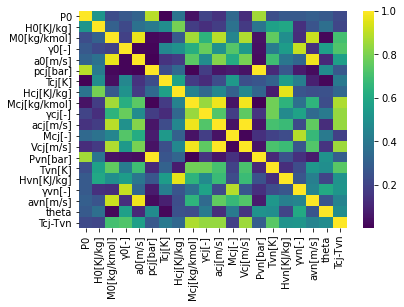

In [3]:
threshold = 0.9

feat_corr = set()
corr_matrix = X_train.corr()
corr_matrix.to_excel('/mnt/c/CEA/matrix1.xlsx')
corr_matrix = corr_matrix.abs()
corr_matrix.to_excel('/mnt/c/CEA/matrix2.xlsx')
plt.figure()
sns.heatmap(corr_matrix,cmap='viridis')
#plt.tight_layout()
plt.savefig('gurafu5.png')

for i in range(len(corr_matrix.columns)):
    z=0
    corr_matrix.iloc[i, i]=0
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            feat_name1 = corr_matrix.columns[i]
            feat_name2 = corr_matrix.columns[j]
            corr_matrix.iloc[i, j]=0
            corr_matrix.iloc[j,i]=0
            corr_matrix.iloc[i, z] = feat_name2
            feat_corr.add(feat_name1)
            z=z+1

        else:
            corr_matrix.iloc[i, j]=0
            corr_matrix.iloc[j,i]=0
        
X_train.drop(labels=feat_corr, axis='columns', inplace=True)
X_val.drop(labels=feat_corr, axis='columns', inplace=True)
XC2H2Hetest.drop(labels=feat_corr, axis='columns', inplace=True)
XC3H6O2test.drop(labels=feat_corr, axis='columns', inplace=True)

print(X_train.columns)
print(len(X_train.columns))

In [4]:
ss = StandardScaler()
sX_train = ss.fit_transform(X_train)
sX_val = ss.fit_transform(X_val)
sX_train = pd.DataFrame(sX_train,columns=X_train.columns)
sX_val = pd.DataFrame(sX_val,columns=X_train.columns)

In [5]:
sol = ['adam']
act = ['relu']
hidd = []

for i in [6]:
    for j in [200]:
        b=[j]*i
        b=tuple(b)
        hidd.append(b)

alp=[1e-2]
param_grid = {'solver':sol,'activation':act,'hidden_layer_sizes':hidd,'alpha':alp}
grid1 = GridSearchCV(MLPRegressor(), param_grid ,cv=2, n_jobs=4)
grid1.fit(sX_train,y_train)

print('Best parameters: {}'.format(grid1.best_params_))
print('Best cross-validation: {}'.format(grid1.best_score_))

Best parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (200, 200, 200, 200, 200, 200), 'solver': 'adam'}
Best cross-validation: 0.9393573768894103


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


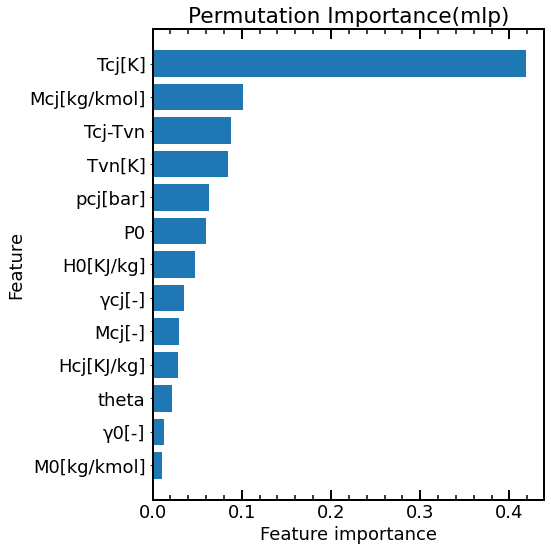

In [6]:
def plot_feature_importance(df):
    n_features = len(df)
    df_plot = df.sort_values('importance')
    f_importance_plot = df_plot['importance'].values
    plt.barh(range(n_features), f_importance_plot, align='center')
    cols_plot = df_plot['feature'].values
    plt.yticks(np.arange(n_features), cols_plot)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    
result = permutation_importance(grid1,sX_train,y_train, n_repeats=5, random_state=42)

cols = list(sX_train.columns)         # 特徴量名のリスト(目的変数CRIM以外)
f_importance = np.array(result["importances"].mean(axis=1)) # 特徴量重要度の算出
f_importance = f_importance / np.sum(f_importance)  # 正規化(必要ない場合はコメントアウト)
df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance})
df1=df_importance
df_importance = df_importance.sort_values("importance",ascending=False)

plt.figure(figsize=(8,8))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

# Tick Setting
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.top'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
#sns.barplot(x="Importance", y="Features",data=df_importance,ci=None)
plot_feature_importance(df_importance)
plt.title("Permutation Importance(mlp)")
plt.tight_layout()
plt.savefig("gurafu11.png")

param_alpha                         0.01
param_hidden_layer_sizes                
(200, 200, 200, 200, 200, 200)  0.939357


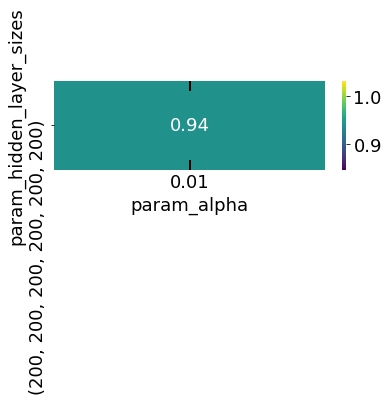

In [7]:
plt.figure()
cv_result = pd.DataFrame(grid1.cv_results_)
cv_result = cv_result[['param_hidden_layer_sizes', 'param_alpha', 'mean_test_score']]
cv_result_pivot = cv_result.pivot_table('mean_test_score', 'param_hidden_layer_sizes', 'param_alpha')
print(cv_result_pivot )
heat_map = sns.heatmap(cv_result_pivot, cmap='viridis', annot=True)
plt.tight_layout()
plt.savefig("gurafu8.png")

ValueError: The number of FixedLocator locations (12), usually from a call to set_ticks, does not match the number of ticklabels (13).

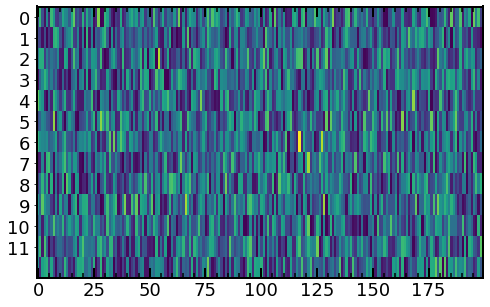

In [8]:
mlp = MLPRegressor(hidden_layer_sizes=(200,200,200,200),alpha=0.01)
mlp.fit(sX_train,y_train)
plt.figure(figsize=(8, 5))
mlp.coefs_[0] = np.abs(mlp.coefs_[0])
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis',aspect='auto')
plt.yticks(range(12), sX_train.columns)
plt.xlim(0,200)
plt.xlabel("重み行列の列")
plt.ylabel("特徴量")
plt.colorbar()
plt.savefig("gurafu9.png")

               MSE        R2  len
H2       11.166905  0.890047   96
C2H2      7.457199  0.956968  103
C2H2AR   13.549326  0.898584  195
C2H2N2    4.874119  0.618320    5
C2H4     16.371384  0.931544   70
C2H4AR   28.423931  0.775071   51
C2H6     17.711357  0.911891   54
C2H6N2O  12.868972  0.564837    9


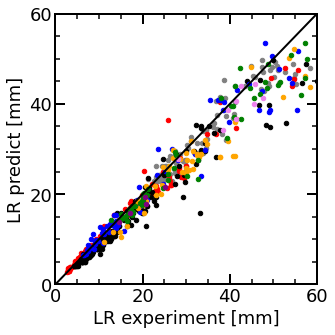

In [12]:
df_H2train = df_train[ (df_train['Fuel'] == 'H2') & (df_train['Diluent'].isnull()) ]
df_C2H2train = df_train[ (df_train['Fuel'] == 'C2H2') & (df_train['Diluent'].isnull()) & (df_train['Oxidizer'] == 'O2')]
df_C2H2ARtrain = df_train[ (df_train['Fuel'] == 'C2H2') & (df_train['Diluent'] == 'Ar') & (df_train['Oxidizer'] == 'O2')]
df_C2H2N2train = df_train[ (df_train['Fuel'] == 'C2H2') & (df_train['Diluent'] == 'N2') & (df_train['Oxidizer'] == 'O2')]
df_C2H4train = df_train[ (df_train['Fuel'] == 'C2H4') & (df_train['Diluent'].isnull()) & (df_train['Oxidizer'] == 'O2')]
df_C2H4ARtrain = df_train[ (df_train['Fuel'] == 'C2H4') & (df_train['Diluent'] == 'Ar') & (df_train['Oxidizer'] == 'O2')]
df_C2H6train = df_train[ (df_train['Fuel'] == 'C2H6') & (df_train['Diluent'].isnull()) & (df_train['Oxidizer'] == 'O2')]
df_C2H6N2Otrain = df_train[ (df_train['Fuel'] == 'C2H6') & (df_train['Diluent'].isnull()) & (df_train['Oxidizer'] == 'N2O')]

X_H2train = df_H2train.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio','inductionlength'])
X_C2H2train = df_C2H2train.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio','inductionlength'])
X_C2H2ARtrain  = df_C2H2ARtrain.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio','inductionlength'])
X_C2H2N2train = df_C2H2N2train.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio','inductionlength'])
X_C2H4train = df_C2H4train.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio','inductionlength'])
X_C2H4ARtrain  = df_C2H4ARtrain.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio','inductionlength'])
X_C2H6train = df_C2H6train.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio','inductionlength'])
X_C2H6N2Otrain = df_C2H6N2Otrain.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio','inductionlength'])

X_H2train.drop(labels=feat_corr, axis='columns', inplace=True)
X_C2H2train.drop(labels=feat_corr, axis='columns', inplace=True)
X_C2H2ARtrain.drop(labels=feat_corr, axis='columns', inplace=True)
X_C2H2N2train.drop(labels=feat_corr, axis='columns', inplace=True)
X_C2H4train.drop(labels=feat_corr, axis='columns', inplace=True)
X_C2H4ARtrain.drop(labels=feat_corr, axis='columns', inplace=True)
X_C2H6train.drop(labels=feat_corr, axis='columns', inplace=True)
X_C2H6N2Otrain.drop(labels=feat_corr, axis='columns', inplace=True)

y_H2train = df_H2train['Lr']
y_C2H2train = df_C2H2train['Lr']
y_C2H2ARtrain = df_C2H2ARtrain['Lr']
y_C2H2N2train = df_C2H2N2train['Lr']
y_C2H4train = df_C2H4train['Lr']
y_C2H4ARtrain = df_C2H4ARtrain['Lr']
y_C2H6train = df_C2H6train['Lr']
y_C2H6N2Otrain = df_C2H6N2Otrain['Lr']

sX_H2train = ss.transform(X_H2train)
sX_C2H2train = ss.transform(X_C2H2train)
sX_C2H2ARtrain = ss.transform(X_C2H2ARtrain)
sX_C2H2N2train = ss.transform(X_C2H2N2train)
sX_C2H4train = ss.transform(X_C2H4train)
sX_C2H4ARtrain = ss.transform(X_C2H4ARtrain)
sX_C2H6train = ss.transform(X_C2H6train)
sX_C2H6N2Otrain = ss.transform(X_C2H6N2Otrain)

resultH2 = grid1.predict(sX_H2train)
MSEH2 = mean_squared_error(y_H2train, resultH2)
R2H2 = r2_score(y_H2train,resultH2)

resultC2H2 = grid1.predict(sX_C2H2train)
MSEC2H2 = mean_squared_error(y_C2H2train, resultC2H2)
R2C2H2 = r2_score(y_C2H2train,resultC2H2)

resultC2H2AR = grid1.predict(sX_C2H2ARtrain)
MSEC2H2AR = mean_squared_error(y_C2H2ARtrain, resultC2H2AR)
R2C2H2AR = r2_score(y_C2H2ARtrain,resultC2H2AR)

resultC2H2N2 = grid1.predict(sX_C2H2N2train)
MSEC2H2N2 = mean_squared_error(y_C2H2N2train, resultC2H2N2)
R2C2H2N2 = r2_score(y_C2H2N2train,resultC2H2N2)

resultC2H4 = grid1.predict(sX_C2H4train)
MSEC2H4 = mean_squared_error(y_C2H4train, resultC2H4)
R2C2H4 = r2_score(y_C2H4train,resultC2H4)

resultC2H4AR = grid1.predict(sX_C2H4ARtrain)
MSEC2H4AR = mean_squared_error(y_C2H4ARtrain, resultC2H4AR)
R2C2H4AR = r2_score(y_C2H4ARtrain, resultC2H4AR)

resultC2H6 = grid1.predict(sX_C2H6train)
MSEC2H6 = mean_squared_error(y_C2H6train, resultC2H6)
R2C2H6 = r2_score(y_C2H6train,resultC2H6)

resultC2H6N2O = grid1.predict(sX_C2H6N2Otrain)
MSEC2H6N2O = mean_squared_error(y_C2H6N2Otrain, resultC2H6N2O)
R2C2H6N2O = r2_score(y_C2H6N2Otrain, resultC2H6N2O)

print(pd.DataFrame([[MSEH2,R2H2,len(y_H2train)], [MSEC2H2,R2C2H2,len(y_C2H2train)],[MSEC2H2AR, R2C2H2AR,len(y_C2H2ARtrain)],[MSEC2H2N2, R2C2H2N2,len(y_C2H2N2train)], [MSEC2H4, R2C2H4,len(y_C2H4train)],[MSEC2H4AR, R2C2H4AR,len(y_C2H4ARtrain)],[MSEC2H6, R2C2H6,len(y_C2H6train)],[MSEC2H6N2O, R2C2H6N2O,len(y_C2H6N2Otrain)]],
                   columns=['MSE', 'R2','len'],
                   index=['H2','C2H2','C2H2AR','C2H2N2','C2H4','C2H4AR','C2H6','C2H6N2O']))


plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.plot([0, 60], [0, 60],color='black')

plt.scatter(y_H2train,resultH2,s=20,color='grey')
plt.scatter(y_C2H2train,resultC2H2,s=20,color='red')
plt.scatter(y_C2H2ARtrain,resultC2H2AR,s=20,color='black')
plt.scatter(y_C2H4train,resultC2H4,s=20,color='blue')
plt.scatter(y_C2H4ARtrain,resultC2H4AR,s=20,color='orange')
plt.scatter(y_C2H6train,resultC2H6,s=20,color='green')
plt.scatter(y_C2H6N2Otrain,resultC2H6N2O,s=20,color='violet')
plt.scatter(y_C2H2N2train,resultC2H2N2,s=20,color='purple')

plt.xlim(0, 60)
plt.ylim(0, 60)
plt.xticks(np.arange(0, 61, step=20))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('LR experiment [mm]')
plt.ylabel('LR predict [mm]')
plt.tight_layout()
plt.savefig("gurafu10.png")

/home/hiroki/.local/lib/python3.8/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


               MSE        R2  len
H2       24.747879  0.837545   25
C2H2      6.208616  0.959653   20
C2H2AR    8.885061  0.924637   50
C2H2N2   13.265923       NaN    1
C2H4      9.247632  0.959228   12
C2H4AR   37.833676  0.640026   21
C2H6     16.914481  0.789530   13
C2H6N2O  47.342280  0.382877    4


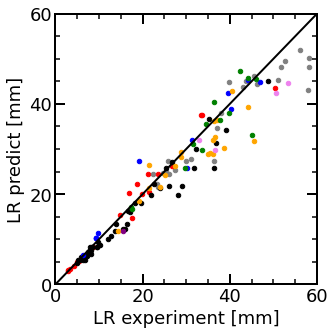

In [34]:
df_H2val = df_val[ (df_val['Fuel'] == 'H2') & (df_val['Diluent'].isnull()) ]
df_C2H2val = df_val[ (df_val['Fuel'] == 'C2H2') & (df_val['Diluent'].isnull()) & (df_val['Oxidizer'] == 'O2')]
df_C2H2ARval = df_val[ (df_val['Fuel'] == 'C2H2') & (df_val['Diluent'] == 'Ar') & (df_val['Oxidizer'] == 'O2')]
df_C2H2N2val = df_val[ (df_val['Fuel'] == 'C2H2') & (df_val['Diluent'] == 'N2') & (df_val['Oxidizer'] == 'O2')]
df_C2H4val = df_val[ (df_val['Fuel'] == 'C2H4') & (df_val['Diluent'].isnull()) & (df_val['Oxidizer'] == 'O2')]
df_C2H4ARval = df_val[ (df_val['Fuel'] == 'C2H4') & (df_val['Diluent'] == 'Ar') & (df_val['Oxidizer'] == 'O2')]
df_C2H6val = df_val[ (df_val['Fuel'] == 'C2H6') & (df_val['Diluent'].isnull()) & (df_val['Oxidizer'] == 'O2')]
df_C2H6N2Oval = df_val[ (df_val['Fuel'] == 'C2H6') & (df_val['Diluent'].isnull()) & (df_val['Oxidizer'] == 'N2O')]

X_H2val = df_H2val.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio','inductionlength'])
X_C2H2val = df_C2H2val.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio','inductionlength'])
X_C2H2ARval  = df_C2H2ARval.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio','inductionlength'])
X_C2H2N2val = df_C2H2N2val.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio','inductionlength'])
X_C2H4val = df_C2H4val.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio','inductionlength'])
X_C2H4ARval  = df_C2H4ARval.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio','inductionlength'])
X_C2H6val = df_C2H6val.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio','inductionlength'])
X_C2H6N2Oval = df_C2H6N2Oval.drop(columns=['Diluent','Fuel','Equivalentratio','CoefficientDiluent','Oxidizer','Lr','Lc','diluentratio','inductionlength'])

X_H2val.drop(labels=feat_corr, axis='columns', inplace=True)
X_C2H2val.drop(labels=feat_corr, axis='columns', inplace=True)
X_C2H2ARval.drop(labels=feat_corr, axis='columns', inplace=True)
X_C2H2N2val.drop(labels=feat_corr, axis='columns', inplace=True)
X_C2H4val.drop(labels=feat_corr, axis='columns', inplace=True)
X_C2H4ARval.drop(labels=feat_corr, axis='columns', inplace=True)
X_C2H6val.drop(labels=feat_corr, axis='columns', inplace=True)
X_C2H6N2Oval.drop(labels=feat_corr, axis='columns', inplace=True)

y_H2val = df_H2val['Lr']
y_C2H2val = df_C2H2val['Lr']
y_C2H2ARval = df_C2H2ARval['Lr']
y_C2H2N2val = df_C2H2N2val['Lr']
y_C2H4val = df_C2H4val['Lr']
y_C2H4ARval = df_C2H4ARval['Lr']
y_C2H6val = df_C2H6val['Lr']
y_C2H6N2Oval = df_C2H6N2Oval['Lr']

sX_H2val = ss.transform(X_H2val)
sX_C2H2val = ss.transform(X_C2H2val)
sX_C2H2ARval = ss.transform(X_C2H2ARval)
sX_C2H2N2val = ss.transform(X_C2H2N2val)
sX_C2H4val = ss.transform(X_C2H4val)
sX_C2H4ARval = ss.transform(X_C2H4ARval)
sX_C2H6val = ss.transform(X_C2H6val)
sX_C2H6N2Oval = ss.transform(X_C2H6N2Oval)

resultH2 = grid1.predict(sX_H2val)
MSEH2 = mean_squared_error(y_H2val, resultH2)
R2H2 = r2_score(y_H2val,resultH2)

resultC2H2 = grid1.predict(sX_C2H2val)
MSEC2H2 = mean_squared_error(y_C2H2val, resultC2H2)
R2C2H2 = r2_score(y_C2H2val,resultC2H2)

resultC2H2AR = grid1.predict(sX_C2H2ARval)
MSEC2H2AR = mean_squared_error(y_C2H2ARval, resultC2H2AR)
R2C2H2AR = r2_score(y_C2H2ARval,resultC2H2AR)

resultC2H2N2 = grid1.predict(sX_C2H2N2val)
MSEC2H2N2 = mean_squared_error(y_C2H2N2val, resultC2H2N2)
R2C2H2N2 = r2_score(y_C2H2N2val,resultC2H2N2)

resultC2H4 = grid1.predict(sX_C2H4val)
MSEC2H4 = mean_squared_error(y_C2H4val, resultC2H4)
R2C2H4 = r2_score(y_C2H4val,resultC2H4)

resultC2H4AR = grid1.predict(sX_C2H4ARval)
MSEC2H4AR = mean_squared_error(y_C2H4ARval, resultC2H4AR)
R2C2H4AR = r2_score(y_C2H4ARval, resultC2H4AR)

resultC2H6 = grid1.predict(sX_C2H6val)
MSEC2H6 = mean_squared_error(y_C2H6val, resultC2H6)
R2C2H6 = r2_score(y_C2H6val,resultC2H6)

resultC2H6N2O = grid1.predict(sX_C2H6N2Oval)
MSEC2H6N2O = mean_squared_error(y_C2H6N2Oval, resultC2H6N2O)
R2C2H6N2O = r2_score(y_C2H6N2Oval, resultC2H6N2O)

print(pd.DataFrame([[MSEH2,R2H2,len(y_H2val)], [MSEC2H2,R2C2H2,len(y_C2H2val)],[MSEC2H2AR, R2C2H2AR,len(y_C2H2ARval)],[MSEC2H2N2, R2C2H2N2,len(y_C2H2N2val)], [MSEC2H4, R2C2H4,len(y_C2H4val)],[MSEC2H4AR, R2C2H4AR,len(y_C2H4ARval)],[MSEC2H6, R2C2H6,len(y_C2H6val)],[MSEC2H6N2O, R2C2H6N2O,len(y_C2H6N2Oval)]],
                   columns=['MSE', 'R2','len'],
                   index=['H2','C2H2','C2H2AR','C2H2N2','C2H4','C2H4AR','C2H6','C2H6N2O']))


plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.plot([0, 60], [0, 60],color='black')

plt.scatter(y_H2val,resultH2,s=20,color='grey')
plt.scatter(y_C2H2val,resultC2H2,s=20,color='red')
plt.scatter(y_C2H2ARval,resultC2H2AR,s=20,color='black')
plt.scatter(y_C2H4val,resultC2H4,s=20,color='blue')
plt.scatter(y_C2H4ARval,resultC2H4AR,s=20,color='orange')
plt.scatter(y_C2H6val,resultC2H6,s=20,color='green')
plt.scatter(y_C2H6N2Oval,resultC2H6N2O,s=20,color='violet')
plt.scatter(y_C2H2N2val,resultC2H2N2,s=20,color='purple')

plt.xlim(0, 60)
plt.ylim(0, 60)
plt.xticks(np.arange(0, 61, step=20))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('LR experiment [mm]')
plt.ylabel('LR predict [mm]')
plt.tight_layout()
plt.savefig("gurafu10.png")

/tmp/ipykernel_868/3921030950.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_H2valP0['P0'] = list(map(calc_double,X_H2valP0['P0']))
/tmp/ipykernel_868/3921030950.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_C2H2valP0['P0']= list(map(calc_double,X_C2H2valP0['P0']))
/tmp/ipykernel_868/3921030950.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

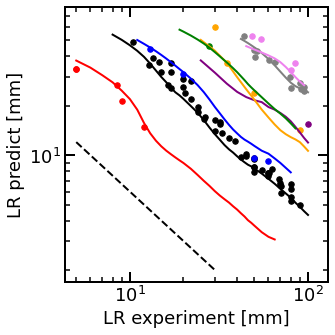

In [35]:
df1 = pd.read_excel('/mnt/c/CEA/data_comp_ppdhasegawa.xlsx')
df2 = pd.read_excel('/mnt/c/CEA/all_mixtureANNC2H2N2C2H2N2OP0LR3.xlsx')
df3 = pd.read_excel('/mnt/c/CEA/all_mixtureANNP0vslrC2H4Ar9.xlsx')

df1 = df1.replace({'Fuel': {'C2H2,acetylene':'C2H2'}})

l = ['Fuel','Diluent','P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]', 'theta']

XpcaFLRDED1 = pd.DataFrame({'P0':df1['P0']})
XpcaFLRDED2 = pd.DataFrame({'P0':df2['P0']})
XpcaFLRDED3 = pd.DataFrame({'P0':df3['P0']})


for i in range(len(l)):
    XpcaFLRDED1[l[i]]=df1[l[i]]

for i in range(len(l)):
    XpcaFLRDED2[l[i]]=df2[l[i]]

for i in range(len(l)):
    XpcaFLRDED3[l[i]]=df3[l[i]]    

XpcaFLRDED1 = XpcaFLRDED1[~( XpcaFLRDED1['theta'] == 0)]
XpcaFLRDED2 = XpcaFLRDED2[~( XpcaFLRDED2['theta'] == 0)]
XpcaFLRDED3 = XpcaFLRDED3[~( XpcaFLRDED3['theta'] == 0)]

dfH2P0 = XpcaFLRDED1[(XpcaFLRDED1['Fuel'] == 'H2')]
dfH2P0 = dfH2P0.query('1.05>P0>0.40')
XH2P0=dfH2P0.drop(columns=['Fuel','Diluent'])

dfC2H2P0 = XpcaFLRDED1[(XpcaFLRDED1['Fuel'] == 'C2H2') & (XpcaFLRDED1['Diluent'].isnull()) ]
dfC2H2P0 = dfC2H2P0.query('0.7>P0>0.03')
XC2H2P0=dfC2H2P0.drop(columns=['Fuel','Diluent'])

dfC2H2ARP0 = XpcaFLRDED1[(XpcaFLRDED1['Fuel'] == 'C2H2') & (XpcaFLRDED1['Diluent'] == 'Ar')]
dfC2H2ARP0 = dfC2H2ARP0.query('1.05>P0>0.07')
XC2H2ARP0 = dfC2H2ARP0.drop(columns=['Fuel','Diluent'])

dfC2H2N2P0 = XpcaFLRDED2[(XpcaFLRDED2['Fuel'] == 'C2H2') & (XpcaFLRDED2['Diluent'] == 'N2')]
dfC2H2N2P0 = dfC2H2N2P0.query('1.05>P0>0.2')
XC2H2N2P0 = dfC2H2N2P0.drop(columns=['Fuel','Diluent'])

dfC2H4P0 = XpcaFLRDED1[(XpcaFLRDED1['Fuel'] == 'C2H4') & (XpcaFLRDED1['Diluent'].isnull()) ]
dfC2H4P0 = dfC2H4P0.query('0.83>P0>0.10')
XC2H4P0 = dfC2H4P0.drop(columns=['Fuel','Diluent'])

dfC2H4ARP0 = XpcaFLRDED3[(XpcaFLRDED3['Fuel'] == 'C2H4') & (XpcaFLRDED3['Diluent'] == 'Ar')]
dfC2H4ARP0 = dfC2H4ARP0.query('1.05>P0>0.2')
XC2H4ARP0 = dfC2H4ARP0.drop(columns=['Fuel','Diluent'])

dfC2H6P0 = XpcaFLRDED1[(XpcaFLRDED1['Fuel'] == 'C2H6') & (XpcaFLRDED1['Diluent'].isnull()) ]
dfC2H6P0 = dfC2H6P0.query('0.88>P0>0.18')
XC2H6P0 = dfC2H6P0.drop(columns=['Fuel','Diluent'])

dfC2H6N2OP0 = XpcaFLRDED2[(XpcaFLRDED2['Fuel'] == 'C2H6') & (XpcaFLRDED2['Diluent'].isnull()) ]
dfC2H6N2OP0 = dfC2H6N2OP0.query('1>P0>0.4')
XC2H6N2OP0 = dfC2H6N2OP0.drop(columns=['Fuel','Diluent'])

sXH2P0 = ss.transform(XH2P0)
sXC2H2P0 = ss.transform(XC2H2P0)
sXC2H2ARP0 = ss.transform(XC2H2ARP0)
sXC2H2N2P0 = ss.transform(XC2H2N2P0)
sXC2H4P0 = ss.transform(XC2H4P0)
sXC2H4ARP0 = ss.transform(XC2H4ARP0)
sXC2H6P0 = ss.transform(XC2H6P0)
sXC2H6N2OP0 = ss.transform(XC2H6N2OP0)

resultH2P0 = grid1.predict(sXH2P0)
resultC2H2P0 = grid1.predict(sXC2H2P0)
resultC2H2ARP0 = grid1.predict(sXC2H2ARP0)
resultC2H2N2P0 = grid1.predict(sXC2H2N2P0)
resultC2H4P0 = grid1.predict(sXC2H4P0)
resultC2H4ARP0 = grid1.predict(sXC2H4ARP0)
resultC2H6P0 = grid1.predict(sXC2H6P0)
resultC2H6N2OP0 = grid1.predict(sXC2H6N2OP0)

def calc_double(n):
    return n*100

X_H2valP0 = df_val[( df_val['Fuel'] == 'H2') & ( df_val['Equivalentratio'] == 1)]
X_C2H2valP0 = df_val[( df_val['Fuel'] == 'C2H2') & ( df_val['Equivalentratio'] == 1) & ( df_val['Diluent'].isnull())]
X_C2H2ARvalP0 = df_val[( df_val['Fuel'] == 'C2H2') & ( df_val['diluentratio'] == 50) & ( df_val['Diluent']=='Ar')]
X_C2H2N2valP0 = df_val[( df_val['Fuel'] == 'C2H2') & ( df_val['diluentratio'] == 50) & ( df_val['Diluent']=='N2' )]
X_C2H4valP0 = df_val[( df_val['Fuel'] == 'C2H4') & ( df_val['Equivalentratio'] == 1) & ( df_val['Diluent'].isnull())]
X_C2H4ARvalP0 = df_val[( df_val['Fuel'] == 'C2H4') & ( df_val['diluentratio'] == 50) & ( df_val['Diluent']=='Ar' )]
X_C2H6valP0 = df_val[( df_val['Fuel'] == 'C2H6') & ( df_val['Equivalentratio'] == 1) & ( df_val['Oxidizer']=='O2')]
X_C2H6N2OvalP0 = df_val[( df_val['Fuel'] == 'C2H6') & ( df_val['Equivalentratio'] == 1) & ( df_val['Oxidizer']=='N2O')]

X_H2valP0['P0'] = list(map(calc_double,X_H2valP0['P0']))
XH2P0['P0'] = list(map(calc_double,XH2P0['P0']))

X_C2H2valP0['P0']= list(map(calc_double,X_C2H2valP0['P0']))
XC2H2P0['P0'] = list(map(calc_double,XC2H2P0['P0']))

X_C2H2ARvalP0['P0'] = list(map(calc_double,X_C2H2ARvalP0['P0']))
XC2H2ARP0['P0'] = list(map(calc_double,XC2H2ARP0['P0']))

X_C2H2N2valP0['P0'] = list(map(calc_double,X_C2H2N2valP0['P0']))
XC2H2N2P0['P0'] = list(map(calc_double,XC2H2N2P0['P0']))

X_C2H4valP0['P0'] = list(map(calc_double,X_C2H4valP0['P0']))
XC2H4P0['P0']= list(map(calc_double,XC2H4P0['P0']))

X_C2H4ARvalP0['P0'] = list(map(calc_double,X_C2H4ARvalP0['P0']))
XC2H4ARP0['P0'] = list(map(calc_double,XC2H4ARP0['P0']))

X_C2H6valP0['P0'] = list(map(calc_double,X_C2H6valP0['P0']))
XC2H6P0['P0'] = list(map(calc_double,XC2H6P0['P0']))

X_C2H6N2OvalP0['P0'] = list(map(calc_double,X_C2H6N2OvalP0['P0']))
XC2H6N2OP0['P0'] = list(map(calc_double,XC2H6N2OP0['P0']))

plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.plot(XH2P0['P0'],resultH2P0,color='grey')
plt.scatter(X_H2valP0['P0'],X_H2valP0['Lr'],s=30,color='grey')

plt.plot(XC2H2P0['P0'],resultC2H2P0,color='red')
plt.scatter(X_C2H2valP0['P0'],X_C2H2valP0['Lr'],s=30,color='red')

plt.plot( XC2H2ARP0['P0'], resultC2H2ARP0, color='black' )
plt.scatter( X_C2H2ARvalP0['P0'], X_C2H2ARvalP0['Lr'],s=30 , color='black' )

plt.plot( XC2H2N2P0['P0'], resultC2H2N2P0, color='purple' )
plt.scatter( X_C2H2N2valP0['P0'], X_C2H2N2valP0['Lr'],s=30 , color='purple')

plt.plot(XC2H4P0['P0'],resultC2H4P0,color='blue')
plt.scatter(X_C2H4valP0['P0'],X_C2H4valP0['Lr'],s=30 ,color='blue')

plt.plot(XC2H4ARP0['P0'],resultC2H4ARP0,color='orange')
plt.scatter(X_C2H4ARvalP0['P0'],X_C2H4ARvalP0['Lr'],s=30 ,color='orange')

plt.plot(XC2H6P0['P0'],resultC2H6P0,color='green')
plt.scatter(X_C2H6valP0['P0'],X_C2H6valP0['Lr'],s=30 ,color='green')

plt.plot(XC2H6N2OP0['P0'],resultC2H6N2OP0,color='violet')
plt.scatter(X_C2H6N2OvalP0['P0'],X_C2H6N2OvalP0['Lr'],s=30 ,color='violet')

x = np.linspace(5, 30, 10)
y = 60/x
plt.plot(x,y,color='black',linestyle='dashed')
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlim(0, 130)
plt.ylim(0, 80)
plt.xlabel('LR experiment [mm]')
plt.ylabel('LR predict [mm]')
plt.tight_layout()
plt.savefig("gurafu5.png")

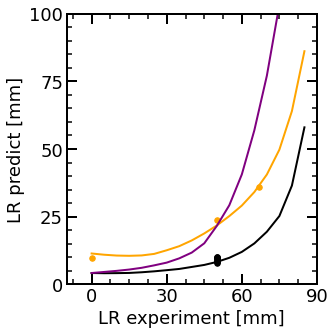

In [36]:
df4 = pd.read_excel('/mnt/c/CEA/all_mixtureANNP050vsdiluent4.xlsx')

l4 = ['Fuel','Diluent','diluentratio','P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]', 'theta']

XpcaFLRDED4 = pd.DataFrame({'P0':df4['P0']})

for i in range(len(l4)):
    XpcaFLRDED4[l4[i]]=df4[l4[i]]

XpcaFLRDED4 = XpcaFLRDED4[~( XpcaFLRDED4['theta'] == 0)]

dfC2H2ARdi = XpcaFLRDED4[(XpcaFLRDED4['Fuel'] == 'C2H2')]
XC2H2ARdi = dfC2H2ARdi.drop(columns=['Fuel','Diluent','diluentratio'])

dfC2H4ARdi = XpcaFLRDED4[(XpcaFLRDED4['Fuel'] == 'C2H4')]
XC2H4ARdi = dfC2H4ARdi.drop(columns=['Fuel','Diluent','diluentratio'])

dfC2H2N2di = XpcaFLRDED4[(XpcaFLRDED4['Fuel'] == 'C2H2N2')]
XC2H2N2di = dfC2H2N2di.drop(columns=['Fuel','Diluent','diluentratio'])

sXC2H2ARdi = ss.transform(XC2H2ARdi)
sXC2H4ARdi = ss.transform(XC2H4ARdi)
sXC2H2N2di = ss.transform(XC2H2N2di)

resultC2H2ARdi = grid1.predict(sXC2H2ARdi)
resultC2H4ARdi = grid1.predict(sXC2H4ARdi)
resultC2H2N2di = grid1.predict(sXC2H2N2di)

dfC2H2exdi = df_val[(df_val['Fuel'] == 'C2H2') & (df_val['Diluent'].isnull()) & (df_val['Equivalentratio'] == 1)]
dfC2H2exdi = dfC2H2exdi.query('0.6>P0>0.4')

dfC2H4exdi = df_val[(df_val['Fuel'] == 'C2H4') & (df_val['Diluent'].isnull())  & (df_val['Equivalentratio'] == 1)]
dfC2H4exdi = dfC2H4exdi.query('0.6>P0>0.4')

dfC2H2ARexdi = df_val[(df_val['Fuel'] == 'C2H2') & (df_val['Equivalentratio'] == 1) & ( df_val['Diluent'] == 'Ar') ]
dfC2H2ARexdi = dfC2H2ARexdi.query('0.6>P0>0.4')

dfC2H2N2exdi = df_val[(df_val['Fuel'] == 'C2H2') & ( df_val['Equivalentratio'] == 1) & ( df_val['Diluent'] == 'N2') ]
dfC2H2N2exdi = dfC2H2N2exdi.query('0.6>P0>0.4')

dfC2H4ARexdi = df_val[( df_val['Fuel'] == 'C2H4') & ( df_val['Equivalentratio'] == 1) & ( df_val['Diluent'] == 'Ar') ]
dfC2H4ARexdi = dfC2H4ARexdi.query('0.6>P0>0.4')

plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.scatter(dfC2H4exdi['diluentratio'],dfC2H4exdi['Lr'],s=30,color='orange')
plt.scatter(dfC2H4ARexdi['diluentratio'],dfC2H4ARexdi['Lr'],s=30,color='orange')

plt.scatter(dfC2H2exdi['diluentratio'],dfC2H2exdi['Lr'],s=30,color='purple')
plt.scatter(dfC2H2ARexdi['diluentratio'],dfC2H2ARexdi['Lr'],s=30,color='black')
plt.scatter(dfC2H2N2exdi['diluentratio'],dfC2H2N2exdi['Lr'],s=30,color='purple')

plt.plot(dfC2H2ARdi['diluentratio'], resultC2H2ARdi, color='black')
plt.plot(dfC2H4ARdi['diluentratio'], resultC2H4ARdi, color='orange')
plt.plot(dfC2H2N2di['diluentratio'],resultC2H2N2di,color='purple')

plt.xlim(-10, 90)
plt.ylim(0, 100)
plt.xticks(np.arange(0, 91, step=30))
plt.yticks(np.arange(0, 101, step=25))
plt.xlabel('LR experiment [mm]')
plt.ylabel('LR predict [mm]')
plt.tight_layout()
plt.savefig("gurafu7.png")

/tmp/ipykernel_868/3128958125.py:79: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 130)
/tmp/ipykernel_868/3128958125.py:80: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 80)


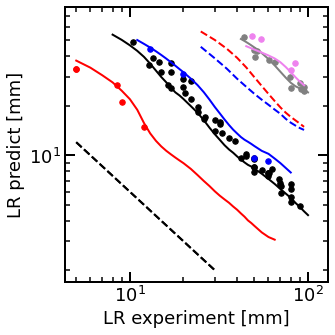

In [38]:
df5 = pd.read_excel('/mnt/c/CEA/all_mixtureANNP0vslrC2H4Ar9.xlsx')

XpcaFLRDED5 = pd.DataFrame({'P0':df5['P0']})

for i in range(len(l)):
    XpcaFLRDED5[l[i]]=df5[l[i]]

XpcaFLRDED5 = XpcaFLRDED5[~( XpcaFLRDED5['theta'] == 0)]

dfCH4 = XpcaFLRDED5[(XpcaFLRDED5['Fuel'] == 'CH4')]
dfCH4 = dfCH4.query('1>P0>0.2')
XCH4=dfCH4.drop(columns=['Fuel','Diluent'])

dfC3H8 = XpcaFLRDED5[(XpcaFLRDED5['Fuel'] == 'C3H8')]
dfC3H8 = dfC3H8.query('1>P0>0.2')
XC3H8=dfC3H8.drop(columns=['Fuel','Diluent'])

sXCH4 = ss.transform(XCH4)
sXC3H8 = ss.transform(XC3H8)

resultCH4=grid1.predict(sXCH4)
resultC3H8=grid1.predict(sXC3H8)

XCH4['P0'] = list(map(calc_double,XCH4['P0']))
XC3H8['P0'] = list(map(calc_double,XC3H8['P0']))


plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.plot(XH2P0['P0'],resultH2P0,color='grey')
plt.scatter(X_H2valP0['P0'],X_H2valP0['Lr'],s=30,color='grey')

plt.plot(XC2H2P0['P0'],resultC2H2P0,color='red')
plt.scatter(X_C2H2valP0['P0'],X_C2H2valP0['Lr'],s=30,color='red')

plt.plot( XC2H2ARP0['P0'], resultC2H2ARP0, color='black' )
plt.scatter( X_C2H2ARvalP0['P0'], X_C2H2ARvalP0['Lr'],s=30 , color='black' )

plt.plot(XC2H4P0['P0'],resultC2H4P0,color='blue')
plt.scatter(X_C2H4valP0['P0'],X_C2H4valP0['Lr'],s=30 ,color='blue')

plt.plot(XC2H6N2OP0['P0'],resultC2H6N2OP0,color='violet')
plt.scatter(X_C2H6N2OvalP0['P0'],X_C2H6N2OvalP0['Lr'],s=30 ,color='violet')

plt.plot(XCH4['P0'],resultCH4,color='red', linestyle='dashed')
plt.plot(XC3H8['P0'],resultC3H8,color='blue', linestyle='dashed')
plt.plot(x,y,color='black',linestyle='dashed')

x = np.linspace(5, 30, 10)
y = 60/x
plt.plot(x,y,color='black',linestyle='dashed')
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlim(0, 130)
plt.ylim(0, 80)
plt.xlabel('LR experiment [mm]')
plt.ylabel('LR predict [mm]')
plt.tight_layout()
plt.savefig("gurafu5.png")

     P0  Fuel  Equivalentratio  H0[KJ/kg]  M0[kg/kmol]   γ0[-]  pcj[bar]  \
0   0.5    H2              0.5       3.17       17.007  1.3997    8.6490   
1   0.5    H2              0.6       3.44       15.644  1.4001    8.8104   
2   0.5    H2              0.7       3.71       14.509  1.4005    8.9264   
3   0.5    H2              0.8       3.97       13.548  1.4009    9.0091   
4   0.5    H2              0.9       4.22       12.724  1.4011    9.0654   
5   0.5    H2              1.0       4.47       12.010  1.4014    9.0994   
6   0.5    H2              1.1       4.71       11.386  1.4016    9.1140   
7   0.5    H2              1.2       4.95       10.834  1.4018    9.1118   
8   0.5    H2              1.3       5.19       10.344  1.4020    9.0949   
9   0.5    H2              1.4       5.41        9.906  1.4021    9.0652   
10  0.5    H2              1.5       5.64        9.512  1.4023    9.0247   
11  0.5  C2H2              0.5    1228.57       31.005  1.3533   12.6720   
12  0.5  C2H

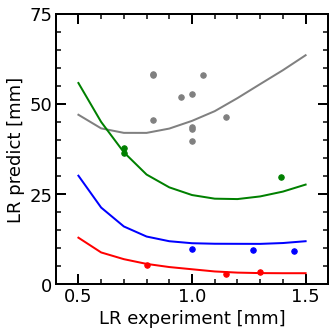

In [49]:
df6 = pd.read_excel('/mnt/c/CEA/all_mixtureANNfaivsLR3.xlsx')

XpcaFLRDED6 = pd.DataFrame({'P0':df6['P0']})

l6 = ['Fuel','Equivalentratio','P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]', 'theta']

for i in range(len(l)):
    XpcaFLRDED6[l6[i]]=df6[l6[i]]

XpcaFLRDED6 = XpcaFLRDED6[~( XpcaFLRDED6['theta'] == 0)]

print(XpcaFLRDED6)

dfH2fai = XpcaFLRDED6[(XpcaFLRDED6['Fuel'] == 'H2')]
XH2fai = dfH2fai.drop(columns=['Fuel','Equivalentratio'])

dfC2H2fai = XpcaFLRDED6[(XpcaFLRDED6['Fuel'] == 'C2H2')]
XC2H2fai = dfC2H2fai.drop(columns=['Fuel','Equivalentratio'])

dfC2H4fai = XpcaFLRDED6[(XpcaFLRDED6['Fuel'] == 'C2H4')]
XC2H4fai = dfC2H4fai.drop(columns=['Fuel','Equivalentratio'])

dfC2H6fai = XpcaFLRDED6[(XpcaFLRDED6['Fuel'] == 'C2H6')]
XC2H6fai = dfC2H6fai.drop(columns=['Fuel','Equivalentratio'])

sXH2fai = ss.transform(XH2fai)
sXC2H2fai = ss.transform(XC2H2fai)
sXC2H4fai = ss.transform(XC2H4fai)
sXC2H6fai = ss.transform(XC2H6fai)

resultH2fai = grid1.predict(sXH2fai)
resultC2H2fai = grid1.predict(sXC2H2fai)
resultC2H4fai = grid1.predict(sXC2H4fai)
resultC2H6fai = grid1.predict(sXC2H6fai)

dfH2exfai = df_val[(df_val['Fuel'] == 'H2')]
dfH2exfai = dfH2exfai.query('0.6>P0>0.4')

dfC2H2exfai = df_val[(df_val['Fuel'] == 'C2H2') & (df_val['Diluent'].isnull())]
dfC2H2exfai = dfC2H2exfai.query('0.6>P0>0.4')

dfC2H4exfai = df_val[(df_val['Fuel'] == 'C2H4') & (df_val['Diluent'].isnull())]
dfC2H4exfai = dfC2H4exfai.query('0.6>P0>0.4')

dfC2H6exfai = df_val[(df_val['Fuel'] == 'C2H6') & (df_val['Oxidizer'] == 'O2')]
dfC2H6exfai = dfC2H6exfai.query('0.6>P0>0.4')

plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.scatter(dfH2exfai['Equivalentratio'],dfH2exfai['Lr'],s=30,color='grey')
plt.scatter(dfC2H2exfai['Equivalentratio'],dfC2H2exfai['Lr'],s=30,color='red')
plt.scatter(dfC2H4exfai['Equivalentratio'],dfC2H4exfai['Lr'],s=30,color='blue')
plt.scatter(dfC2H6exfai['Equivalentratio'],dfC2H6exfai['Lr'],s=30,color='green')

plt.plot(dfH2fai['Equivalentratio'],resultH2fai,color='grey')
plt.plot(dfC2H2fai['Equivalentratio'],resultC2H2fai,color='red')
plt.plot(dfC2H4fai['Equivalentratio'],resultC2H4fai,color='blue')
plt.plot(dfC2H6fai['Equivalentratio'],resultC2H6fai,color='green')

plt.xlim(0.4,1.6)
plt.ylim(0, 75)
plt.xticks(np.arange(0.5, 1.51, step=0.5))
plt.yticks(np.arange(0, 76, step=25))
plt.xlabel('LR experiment [mm]')
plt.ylabel('LR predict [mm]')
plt.tight_layout()
plt.savefig("gurafu7.png")

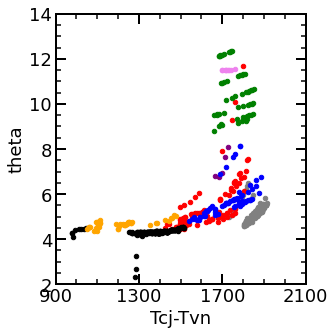

In [14]:
l6 = ['Fuel','Equivalentratio','P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]', 'theta']
       

plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.scatter(X_H2train['Tcj[K]']-X_H2train['Tvn[K]'],X_H2train['theta'],s=20,color='grey')
plt.scatter(X_C2H2train['Tcj[K]']-X_C2H2train['Tvn[K]'],X_C2H2train['theta'],s=20,color='red')
plt.scatter(X_C2H2ARtrain['Tcj[K]']-X_C2H2ARtrain['Tvn[K]'],X_C2H2ARtrain['theta'],s=20,color='black')
plt.scatter(X_C2H2N2train['Tcj[K]']-X_C2H2N2train['Tvn[K]'],X_C2H2N2train['theta'],s=20,color='purple')
plt.scatter(X_C2H4train['Tcj[K]']-X_C2H4train['Tvn[K]'],X_C2H4train['theta'],s=20,color='blue')
plt.scatter(X_C2H4ARtrain['Tcj[K]']-X_C2H4ARtrain['Tvn[K]'],X_C2H4ARtrain['theta'],s=20,color='orange')
plt.scatter(X_C2H6train['Tcj[K]']-X_C2H6train['Tvn[K]'],X_C2H6train['theta'],s=20,color='green')
plt.scatter(X_C2H6N2Otrain['Tcj[K]']-X_C2H6N2Otrain['Tvn[K]'],X_C2H6N2Otrain['theta'],s=20,color='violet')

plt.xlim(900, 2000)
plt.ylim(2, 14)
plt.xticks(np.arange(900, 2101, step=400))
plt.yticks(np.arange(2, 14.1, step=2))
plt.xlabel('Tcj-Tvn')
plt.ylabel('theta')
plt.tight_layout()
plt.savefig("gurafu29.png")

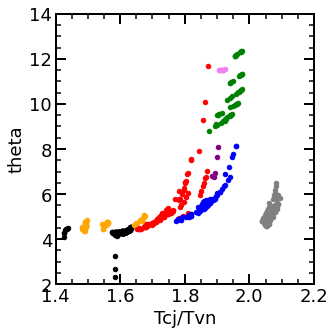

In [17]:

plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.scatter(X_H2train['Tcj[K]']/X_H2train['Tvn[K]'],X_H2train['theta'],s=20,color='grey')
plt.scatter(X_C2H2train['Tcj[K]']/X_C2H2train['Tvn[K]'],X_C2H2train['theta'],s=20,color='red')
plt.scatter(X_C2H2ARtrain['Tcj[K]']/X_C2H2ARtrain['Tvn[K]'],X_C2H2ARtrain['theta'],s=20,color='black')
plt.scatter(X_C2H2N2train['Tcj[K]']/X_C2H2N2train['Tvn[K]'],X_C2H2N2train['theta'],s=20,color='purple')
plt.scatter(X_C2H4train['Tcj[K]']/X_C2H4train['Tvn[K]'],X_C2H4train['theta'],s=20,color='blue')
plt.scatter(X_C2H4ARtrain['Tcj[K]']/X_C2H4ARtrain['Tvn[K]'],X_C2H4ARtrain['theta'],s=20,color='orange')
plt.scatter(X_C2H6train['Tcj[K]']/X_C2H6train['Tvn[K]'],X_C2H6train['theta'],s=20,color='green')
plt.scatter(X_C2H6N2Otrain['Tcj[K]']/X_C2H6N2Otrain['Tvn[K]'],X_C2H6N2Otrain['theta'],s=20,color='violet')

plt.xlim(1.4, 2.2)
plt.ylim(2, 14)
plt.xticks(np.arange(1.4, 2.21, step=0.2))
plt.yticks(np.arange(2, 14.1, step=2))
plt.xlabel('Tcj/Tvn')
plt.ylabel('theta')
plt.tight_layout()
plt.savefig("gurafu29.png")

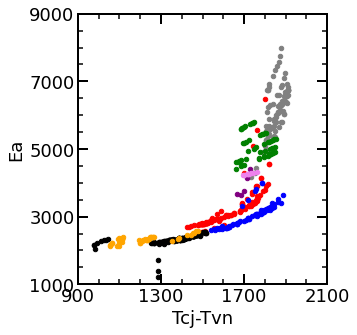

In [13]:
l6 = ['Fuel','Equivalentratio','P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]', 'theta']
       

plt.figure(figsize=(5.3,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.scatter(X_H2train['Tcj[K]']-X_H2train['Tvn[K]'],X_H2train['theta']*X_H2train['Tvn[K]']/X_H2train['M0[kg/kmol]']*8.314,s=20,color='grey')
plt.scatter(X_C2H2train['Tcj[K]']-X_C2H2train['Tvn[K]'],X_C2H2train['theta']*X_C2H2train['Tvn[K]']/X_C2H2train['M0[kg/kmol]']*8.314,s=20,color='red')
plt.scatter(X_C2H2ARtrain['Tcj[K]']-X_C2H2ARtrain['Tvn[K]'],X_C2H2ARtrain['theta']*X_C2H2ARtrain['Tvn[K]']/X_C2H2ARtrain['M0[kg/kmol]']*8.314,s=20,color='black')
plt.scatter(X_C2H2N2train['Tcj[K]']-X_C2H2N2train['Tvn[K]'],X_C2H2N2train['theta']*X_C2H2N2train['Tvn[K]']/X_C2H2N2train['M0[kg/kmol]']*8.314,s=20,color='purple')
plt.scatter(X_C2H4train['Tcj[K]']-X_C2H4train['Tvn[K]'],X_C2H4train['theta']*X_C2H4train['Tvn[K]']/X_C2H4train['M0[kg/kmol]']*8.314,s=20,color='blue')
plt.scatter(X_C2H4ARtrain['Tcj[K]']-X_C2H4ARtrain['Tvn[K]'],X_C2H4ARtrain['theta']*X_C2H4ARtrain['Tvn[K]']/X_C2H4ARtrain['M0[kg/kmol]']*8.314,s=20,color='orange')
plt.scatter(X_C2H6train['Tcj[K]']-X_C2H6train['Tvn[K]'],X_C2H6train['theta']*X_C2H6train['Tvn[K]']/X_C2H6train['M0[kg/kmol]']*8.314,s=20,color='green')
plt.scatter(X_C2H6N2Otrain['Tcj[K]']-X_C2H6N2Otrain['Tvn[K]'],X_C2H6N2Otrain['theta']*X_C2H6N2Otrain['Tvn[K]']/X_C2H6N2Otrain['M0[kg/kmol]']*8.314,s=20,color='violet')

plt.xlim(900, 2000)
plt.ylim(1000, 9000)
plt.xticks(np.arange(900, 2101, step=400))
plt.yticks(np.arange(1000, 9001, step=2000))
plt.xlabel('Tcj-Tvn')
plt.ylabel('Ea')
plt.tight_layout()
plt.savefig("gurafu29.png")

    P0  Fuel Diluent Oxidizer  H0[KJ/kg]  M0[kg/kmol]   γ0[-]  pcj[bar]  \
0    1    H2     NaN       O2    -115.63       12.010  1.4091    22.532   
2    1  C2H2     NaN       O2    2099.78       30.296  1.3465    40.637   
3    1  C2H2     NaN       O2    2210.64       30.296  1.3140    28.659   
4    1  C2H2      Ar       O2     891.38       35.122  1.4560    32.293   
5    1  C2H2      Ar       O2     968.79       35.122  1.4269    22.764   
6    1  C2H2      N2       O2    1066.95       29.154  1.3713    29.264   
7    1  C2H2      N2       O2    1174.50       29.154  1.3513    20.712   
8    1  C2H4     NaN       O2     373.33       31.012  1.3577    40.094   
9    1  C2H4     NaN       O2     479.23       31.012  1.3202    28.302   
10   1  C2H4      Ar       O2     149.05       35.480  1.4656    31.492   
11   1  C2H4      Ar       O2     224.63       35.480  1.4326    22.218   
12   1  C2H6     NaN       O2    -641.81       31.570  1.3346    40.742   
13   1  C2H6     NaN     

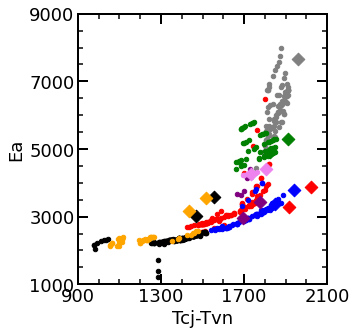

In [44]:
df7 = pd.read_excel('/mnt/c/CEA/all_mixtureT0250to350to1.xlsx')

XpcaFLRDED7 = pd.DataFrame({'P0':df7['P0']})

l7 = ['Fuel','Diluent','Oxidizer','P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]', 'theta']

for i in range(len(l7)):
    XpcaFLRDED7[l7[i]]=df7[l7[i]]

XpcaFLRDED7 = XpcaFLRDED7[~( XpcaFLRDED7['theta'] == 0)]

print(XpcaFLRDED7)

dfH2T0 = XpcaFLRDED7[(XpcaFLRDED7['Fuel'] == 'H2')]
dfC2H2T0 = XpcaFLRDED7[(XpcaFLRDED7['Fuel'] == 'C2H2') & ( XpcaFLRDED7['Diluent'].isnull())]
dfC2H2ART0 = XpcaFLRDED7[(XpcaFLRDED7['Fuel'] == 'C2H2') & ( XpcaFLRDED7['Diluent'] == 'Ar')]
dfC2H2N2T0 = XpcaFLRDED7[(XpcaFLRDED7['Fuel'] == 'C2H2') & ( XpcaFLRDED7['Diluent'] == 'N2')]
dfC2H4T0 = XpcaFLRDED7[(XpcaFLRDED7['Fuel'] == 'C2H4') & ( XpcaFLRDED7['Diluent'].isnull())]
dfC2H4ART0 = XpcaFLRDED7[(XpcaFLRDED7['Fuel'] == 'C2H4') & ( XpcaFLRDED7['Diluent'] == 'Ar')]
dfC2H6T0 = XpcaFLRDED7[(XpcaFLRDED7['Fuel'] == 'C2H6') & ( XpcaFLRDED7['Oxidizer'] == 'O2')]
dfC2H6N2OT0 = XpcaFLRDED7[(XpcaFLRDED7['Fuel'] == 'C2H6') & ( XpcaFLRDED7['Oxidizer'] == 'N2O')]       

plt.figure(figsize=(5.3,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.scatter(X_H2train['Tcj[K]']-X_H2train['Tvn[K]'],X_H2train['theta']*X_H2train['Tvn[K]']/X_H2train['M0[kg/kmol]']*8.314,s=20,color='grey')
plt.scatter(X_C2H2train['Tcj[K]']-X_C2H2train['Tvn[K]'],X_C2H2train['theta']*X_C2H2train['Tvn[K]']/X_C2H2train['M0[kg/kmol]']*8.314,s=20,color='red')
plt.scatter(X_C2H2ARtrain['Tcj[K]']-X_C2H2ARtrain['Tvn[K]'],X_C2H2ARtrain['theta']*X_C2H2ARtrain['Tvn[K]']/X_C2H2ARtrain['M0[kg/kmol]']*8.314,s=20,color='black')
plt.scatter(X_C2H2N2train['Tcj[K]']-X_C2H2N2train['Tvn[K]'],X_C2H2N2train['theta']*X_C2H2N2train['Tvn[K]']/X_C2H2N2train['M0[kg/kmol]']*8.314,s=20,color='purple')
plt.scatter(X_C2H4train['Tcj[K]']-X_C2H4train['Tvn[K]'],X_C2H4train['theta']*X_C2H4train['Tvn[K]']/X_C2H4train['M0[kg/kmol]']*8.314,s=20,color='blue')
plt.scatter(X_C2H4ARtrain['Tcj[K]']-X_C2H4ARtrain['Tvn[K]'],X_C2H4ARtrain['theta']*X_C2H4ARtrain['Tvn[K]']/X_C2H4ARtrain['M0[kg/kmol]']*8.314,s=20,color='orange')
plt.scatter(X_C2H6train['Tcj[K]']-X_C2H6train['Tvn[K]'],X_C2H6train['theta']*X_C2H6train['Tvn[K]']/X_C2H6train['M0[kg/kmol]']*8.314,s=20,color='green')
plt.scatter(X_C2H6N2Otrain['Tcj[K]']-X_C2H6N2Otrain['Tvn[K]'],X_C2H6N2Otrain['theta']*X_C2H6N2Otrain['Tvn[K]']/X_C2H6N2Otrain['M0[kg/kmol]']*8.314,s=20,color='violet')

plt.scatter(dfH2T0['Tcj[K]']-dfH2T0['Tvn[K]'],dfH2T0['theta']*dfH2T0['Tvn[K]']/dfH2T0['M0[kg/kmol]']*8.314,s=80,color='grey',marker='D')
plt.scatter(dfC2H2T0['Tcj[K]']-dfC2H2T0['Tvn[K]'],dfC2H2T0['theta']*dfC2H2T0['Tvn[K]']/dfC2H2T0['M0[kg/kmol]']*8.314,s=80,color='red',marker='D')
plt.scatter(dfC2H2ART0['Tcj[K]']-dfC2H2ART0['Tvn[K]'],dfC2H2ART0['theta']*dfC2H2ART0['Tvn[K]']/dfC2H2ART0['M0[kg/kmol]']*8.314,s=80,color='black',marker='D')
plt.scatter(dfC2H2N2T0['Tcj[K]']-dfC2H2N2T0['Tvn[K]'],dfC2H2N2T0['theta']*dfC2H2N2T0['Tvn[K]']/dfC2H2N2T0['M0[kg/kmol]']*8.314,s=80,color='purple',marker='D')
plt.scatter(dfC2H4T0['Tcj[K]']-dfC2H4T0['Tvn[K]'],dfC2H4T0['theta']*dfC2H4T0['Tvn[K]']/dfC2H4T0['M0[kg/kmol]']*8.314,s=80,color='blue',marker='D')
plt.scatter(dfC2H4ART0['Tcj[K]']-dfC2H4ART0['Tvn[K]'],dfC2H4ART0['theta']*dfC2H4ART0['Tvn[K]']/dfC2H4ART0['M0[kg/kmol]']*8.314,s=80,color='orange',marker='D')
plt.scatter(dfC2H6T0['Tcj[K]']-dfC2H6T0['Tvn[K]'],dfC2H6T0['theta']*dfC2H6T0['Tvn[K]']/dfC2H6T0['M0[kg/kmol]']*8.314,s=80,color='green',marker='D')
plt.scatter(dfC2H6N2OT0['Tcj[K]']-dfC2H6N2OT0['Tvn[K]'],dfC2H6N2OT0['theta']*dfC2H6N2OT0['Tvn[K]']/dfC2H6N2OT0['M0[kg/kmol]']*8.314,s=80,color='violet',marker='D')
plt.xlim(900, 2000)
plt.ylim(1000, 9000)
plt.xticks(np.arange(900, 2101, step=400))
plt.yticks(np.arange(1000, 9001, step=2000))
plt.xlabel('Tcj-Tvn')
plt.ylabel('Ea')
plt.tight_layout()
plt.savefig("gurafu29.png")

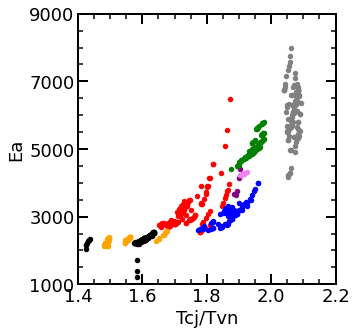

In [18]:
l6 = ['Fuel','Equivalentratio','P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]', 'theta']
       

plt.figure(figsize=(5.3,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.scatter(X_H2train['Tcj[K]']/X_H2train['Tvn[K]'],X_H2train['theta']*X_H2train['Tvn[K]']/X_H2train['M0[kg/kmol]']*8.314,s=20,color='grey')
plt.scatter(X_C2H2train['Tcj[K]']/X_C2H2train['Tvn[K]'],X_C2H2train['theta']*X_C2H2train['Tvn[K]']/X_C2H2train['M0[kg/kmol]']*8.314,s=20,color='red')
plt.scatter(X_C2H2ARtrain['Tcj[K]']/X_C2H2ARtrain['Tvn[K]'],X_C2H2ARtrain['theta']*X_C2H2ARtrain['Tvn[K]']/X_C2H2ARtrain['M0[kg/kmol]']*8.314,s=20,color='black')
plt.scatter(X_C2H2N2train['Tcj[K]']/X_C2H2N2train['Tvn[K]'],X_C2H2N2train['theta']*X_C2H2N2train['Tvn[K]']/X_C2H2N2train['M0[kg/kmol]']*8.314,s=20,color='purple')
plt.scatter(X_C2H4train['Tcj[K]']/X_C2H4train['Tvn[K]'],X_C2H4train['theta']*X_C2H4train['Tvn[K]']/X_C2H4train['M0[kg/kmol]']*8.314,s=20,color='blue')
plt.scatter(X_C2H4ARtrain['Tcj[K]']/X_C2H4ARtrain['Tvn[K]'],X_C2H4ARtrain['theta']*X_C2H4ARtrain['Tvn[K]']/X_C2H4ARtrain['M0[kg/kmol]']*8.314,s=20,color='orange')
plt.scatter(X_C2H6train['Tcj[K]']/X_C2H6train['Tvn[K]'],X_C2H6train['theta']*X_C2H6train['Tvn[K]']/X_C2H6train['M0[kg/kmol]']*8.314,s=20,color='green')
plt.scatter(X_C2H6N2Otrain['Tcj[K]']/X_C2H6N2Otrain['Tvn[K]'],X_C2H6N2Otrain['theta']*X_C2H6N2Otrain['Tvn[K]']/X_C2H6N2Otrain['M0[kg/kmol]']*8.314,s=20,color='violet')

plt.xlim(1.4, 2.2)
plt.ylim(1000, 9000)
plt.xticks(np.arange(1.4, 2.21, step=0.2))
plt.yticks(np.arange(1000, 9001, step=2000))
plt.xlabel('Tcj/Tvn')
plt.ylabel('Ea')
plt.tight_layout()
plt.savefig("gurafu29.png")

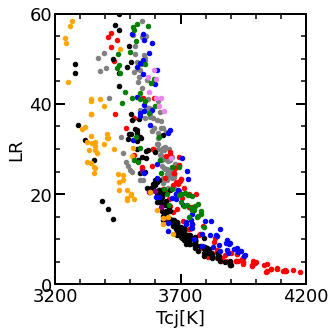

In [92]:
#Index(['P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
#       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]', 'theta'],
#      dtype='object')



plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.scatter(X_H2train['Tcj[K]'],y_H2train,s=20,color='grey')
plt.scatter(X_C2H2train['Tcj[K]'],y_C2H2train,s=20,color='red')
plt.scatter(X_C2H2ARtrain['Tcj[K]'],y_C2H2ARtrain,s=20,color='black')
plt.scatter(X_C2H2N2train['Tcj[K]'],y_C2H2N2train,s=20,color='purple')
plt.scatter(X_C2H4train['Tcj[K]'],y_C2H4train,s=20,color='blue')
plt.scatter(X_C2H4ARtrain['Tcj[K]'],y_C2H4ARtrain,s=20,color='orange')
plt.scatter(X_C2H6train['Tcj[K]'],y_C2H6train,s=20,color='green')
plt.scatter(X_C2H6N2Otrain['Tcj[K]'],y_C2H6N2Otrain,s=20,color='violet')

plt.xlim(3200, 4200)
plt.ylim(0, 60)
plt.xticks(np.arange(3200, 4201, step=500))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('Tcj[K]')
plt.ylabel('LR')
plt.tight_layout()
plt.savefig("gurafu29.png")

/tmp/ipykernel_244/2703210782.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_H2train['Ea[K]'] = df_H2train['theta']*df_H2train['Tvn[K]']/df_H2train['M0[kg/kmol]']*8.314
/tmp/ipykernel_244/2703210782.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_C2H2train['Ea[K]'] = df_C2H2train['theta']*df_C2H2train['Tvn[K]']/df_C2H2train['M0[kg/kmol]']*8.314
/tmp/ipykernel_244/2703210782.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

        P0  H0[KJ/kg]  M0[kg/kmol]   γ0[-]  pcj[bar]   Tcj[K]  Hcj[KJ/kg]  \
274  0.901      -4.59       12.010  1.4019    16.961  3655.66     2817.07   
243  0.443      -5.07       12.010  1.4019     8.139  3525.65     2742.25   
309  0.970       0.00       12.355  1.4016    18.202  3665.46     2744.92   
337  0.852      -8.94       15.283  1.4010    15.697  3539.06     2138.50   
291  0.642       0.00       13.288  1.4013    11.803  3569.88     2496.39   
..     ...        ...          ...     ...       ...      ...         ...   
296  0.900      -6.34       13.288  1.4015    16.861  3631.69     2522.62   
346  0.807      -4.20       10.344  1.4024    15.100  3609.67     3256.38   
259  0.693      -4.59       12.010  1.4019    12.926  3606.87     2789.41   
345  0.728      -7.00       10.344  1.4025    13.621  3591.59     3242.14   
328  0.800      -6.70       11.688  1.4021    15.056  3634.76     2883.96   

     Mcj[kg/kmol]  γcj[-]  Mcj[-]   Tvn[K]     theta  Tcj-Tvn        Ea[K] 

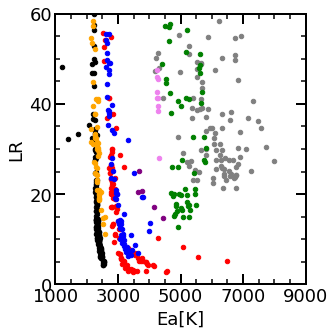

In [29]:
#Index(['P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
#       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]', 'theta'],
#      dtype='object')

plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.scatter(X_H2train['theta']*X_H2train['Tvn[K]']/X_H2train['M0[kg/kmol]']*8.314,y_H2train,s=20,color='grey')
plt.scatter(X_C2H2train['theta']*X_C2H2train['Tvn[K]']/X_C2H2train['M0[kg/kmol]']*8.314,y_C2H2train,s=20,color='red')
plt.scatter(X_C2H2ARtrain['theta']*X_C2H2ARtrain['Tvn[K]']/X_C2H2ARtrain['M0[kg/kmol]']*8.314,y_C2H2ARtrain,s=20,color='black')
plt.scatter(X_C2H2N2train['theta']*X_C2H2N2train['Tvn[K]']/X_C2H2N2train['M0[kg/kmol]']*8.314,y_C2H2N2train,s=20,color='purple')
plt.scatter(X_C2H4train['theta']*X_C2H4train['Tvn[K]']/X_C2H4train['M0[kg/kmol]']*8.314,y_C2H4train,s=20,color='blue')
plt.scatter(X_C2H4ARtrain['theta']*X_C2H4ARtrain['Tvn[K]']/X_C2H4ARtrain['M0[kg/kmol]']*8.314,y_C2H4ARtrain,s=20,color='orange')
plt.scatter(X_C2H6train['theta']*X_C2H6train['Tvn[K]']/X_C2H6train['M0[kg/kmol]']*8.314,y_C2H6train,s=20,color='green')
plt.scatter(X_C2H6N2Otrain['theta']*X_C2H6N2Otrain['Tvn[K]']/X_C2H6N2Otrain['M0[kg/kmol]']*8.314,y_C2H6N2Otrain,s=20,color='violet')

plt.xlim(1000, 9000)
plt.ylim(0, 60)
plt.xticks(np.arange(1000, 9001, step=2000))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('Ea[K]')
plt.ylabel('LR')
plt.tight_layout()
plt.savefig("gurafu29.png")

df_H2train['Ea[K]'] = df_H2train['theta']*df_H2train['Tvn[K]']/df_H2train['M0[kg/kmol]']*8.314
df_C2H2train['Ea[K]'] = df_C2H2train['theta']*df_C2H2train['Tvn[K]']/df_C2H2train['M0[kg/kmol]']*8.314
df_C2H2ARtrain['Ea[K]'] = df_C2H2ARtrain['theta']*df_C2H2ARtrain['Tvn[K]']/df_C2H2ARtrain['M0[kg/kmol]']*8.314
df_C2H2N2train['Ea[K]'] = df_C2H2N2train['theta']*df_C2H2N2train['Tvn[K]']/df_C2H2N2train['M0[kg/kmol]']*8.314
df_C2H4train['Ea[K]'] = df_C2H4train['theta']*df_C2H4train['Tvn[K]']/df_C2H4train['M0[kg/kmol]']*8.314
df_C2H4ARtrain['Ea[K]'] = df_C2H4ARtrain['theta']*df_C2H4ARtrain['Tvn[K]']/df_C2H4ARtrain['M0[kg/kmol]']*8.314
df_C2H6train['Ea[K]'] = df_C2H6train['theta']*df_C2H6train['Tvn[K]']/df_C2H6train['M0[kg/kmol]']*8.314
df_C2H6N2Otrain['Ea[K]'] = df_C2H6N2Otrain['theta']*df_C2H6N2Otrain['Tvn[K]']/df_C2H6N2Otrain['M0[kg/kmol]']*8.314
print(X_H2train)

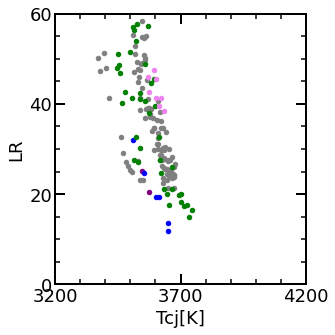

In [36]:
#.query('1>P0>0.4')
#Index(['P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
#       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]', 'theta'],
#      dtype='object')



plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

df_H2train1 = df_H2train[df_H2train['Tvn[K]'] < 1900]
df_C2H2train1 =  df_C2H2train[df_C2H2train['Tvn[K]'] < 1900]
df_C2H2ARtrain1 =  df_C2H2ARtrain[df_C2H2ARtrain['Tvn[K]'] < 1900] 
df_C2H2N2train1 =  df_C2H2N2train[df_C2H2N2train['Tvn[K]'] < 1900] 
df_C2H4train1 =  df_C2H4train[df_C2H4train['Tvn[K]'] < 1900]
df_C2H4ARtrain1 =  df_C2H4ARtrain[df_C2H4ARtrain['Tvn[K]'] < 1900] 
df_C2H6train1 =  df_C2H6train[df_C2H6train['Tvn[K]'] < 1900]
df_C2H6N2Otrain1 =  df_C2H6N2Otrain[df_C2H6N2Otrain['Tvn[K]'] < 1900] 

plt.scatter(df_H2train1['Tcj[K]'],df_H2train1['Lr'],s=20,color='grey')
plt.scatter(df_C2H2train1['Tcj[K]'],df_C2H2train1['Lr'],s=20,color='red')
plt.scatter(df_C2H2ARtrain1['Tcj[K]'],df_C2H2ARtrain1['Lr'],s=20,color='black')
plt.scatter(df_C2H2N2train1['Tcj[K]'],df_C2H2N2train1['Lr'],s=20,color='purple')
plt.scatter(df_C2H4train1['Tcj[K]'],df_C2H4train1['Lr'],s=20,color='blue')
plt.scatter(df_C2H4ARtrain1['Tcj[K]'],df_C2H4ARtrain1['Lr'],s=20,color='orange')
plt.scatter(df_C2H6train1['Tcj[K]'],df_C2H6train1['Lr'],s=20,color='green')
plt.scatter(df_C2H6N2Otrain1['Tcj[K]'],df_C2H6N2Otrain1['Lr'],s=20,color='violet')

plt.xlim(3200, 4200)
plt.ylim(0, 60)
plt.xticks(np.arange(3200, 4201, step=500))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('Tcj[K]')
plt.ylabel('LR')
plt.tight_layout()
plt.savefig("gurafu29.png")

        P0 Fuel Diluent  Equivalentratio  CoefficientDiluent Oxidizer  \
274  0.901   H2     NaN             1.00                 NaN       O2   
243  0.443   H2     NaN             1.00                 NaN       O2   
309  0.970   H2     NaN             0.95                 NaN       O2   
337  0.852   H2     NaN             0.63                 NaN       O2   
291  0.642   H2     NaN             0.83                 NaN       O2   
..     ...  ...     ...              ...                 ...      ...   
296  0.900   H2     NaN             0.83                 NaN       O2   
346  0.807   H2     NaN             1.30                 NaN       O2   
259  0.693   H2     NaN             1.00                 NaN       O2   
345  0.728   H2     NaN             1.30                 NaN       O2   
328  0.800   H2     NaN             1.05                 NaN       O2   

     diluentratio  H0[KJ/kg]  M0[kg/kmol]   γ0[-]  ...   Tvn[K]  Hvn[KJ/kg]  \
274           0.0      -4.59       12.010  1

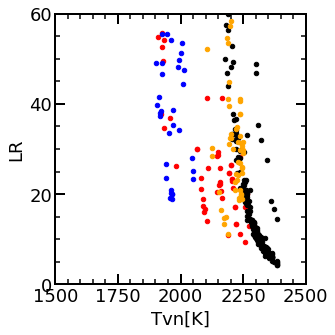

In [44]:

plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5
print(df_H2train)

df_H2trainEa1 = df_H2train[df_H2train['Ea[K]'] < 3000]
df_C2H2trainEa1 =  df_C2H2train[df_C2H2train['Ea[K]'] < 3000]
df_C2H2ARtrainEa1 =  df_C2H2ARtrain[df_C2H2ARtrain['Ea[K]'] < 3000] 
df_C2H2N2trainEa1 =  df_C2H2N2train[df_C2H2N2train['Ea[K]'] < 3000] 
df_C2H4trainEa1 =  df_C2H4train[df_C2H4train['Ea[K]'] < 3000]
df_C2H4ARtrainEa1 =  df_C2H4ARtrain[df_C2H4ARtrain['Ea[K]'] < 3000] 
df_C2H6trainEa1 =  df_C2H6train[df_C2H6train['Ea[K]'] < 3000]
df_C2H6N2OtrainEa1 =  df_C2H6N2Otrain[df_C2H6N2Otrain['Ea[K]'] < 3000] 

plt.scatter(df_H2trainEa1['Tvn[K]'],df_H2trainEa1['Lr'],s=20,color='grey')
plt.scatter(df_C2H2trainEa1['Tvn[K]'],df_C2H2trainEa1['Lr'],s=20,color='red')
plt.scatter(df_C2H2ARtrainEa1['Tvn[K]'],df_C2H2ARtrainEa1['Lr'],s=20,color='black')
plt.scatter(df_C2H2N2trainEa1['Tvn[K]'],df_C2H2N2trainEa1['Lr'],s=20,color='purple')
plt.scatter(df_C2H4trainEa1['Tvn[K]'],df_C2H4trainEa1['Lr'],s=20,color='blue')
plt.scatter(df_C2H4ARtrainEa1['Tvn[K]'],df_C2H4ARtrainEa1['Lr'],s=20,color='orange')
plt.scatter(df_C2H6trainEa1['Tvn[K]'],df_C2H6trainEa1['Lr'],s=20,color='green')
plt.scatter(df_C2H6N2OtrainEa1['Tvn[K]'],df_C2H6N2OtrainEa1['Lr'],s=20,color='violet')

plt.xlim(1500, 2500)
plt.ylim(0, 60)
plt.xticks(np.arange(1500, 2501, step=250))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('Tvn[K]')
plt.ylabel('LR')
plt.tight_layout()
plt.savefig("gurafu29.png")

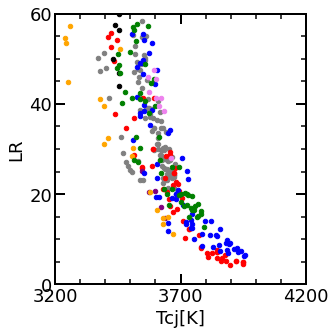

In [37]:
#.query('1>P0>0.4')
#Index(['P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
#       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]', 'theta'],
#      dtype='object')



plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

df_H2train1 = df_H2train[df_H2train['Tvn[K]'] < 2200]
df_C2H2train1 =  df_C2H2train[df_C2H2train['Tvn[K]'] < 2200]
df_C2H2ARtrain1 =  df_C2H2ARtrain[df_C2H2ARtrain['Tvn[K]'] < 2200] 
df_C2H2N2train1 =  df_C2H2N2train[df_C2H2N2train['Tvn[K]'] < 2200] 
df_C2H4train1 =  df_C2H4train[df_C2H4train['Tvn[K]'] < 2200]
df_C2H4ARtrain1 =  df_C2H4ARtrain[df_C2H4ARtrain['Tvn[K]'] < 2200] 
df_C2H6train1 =  df_C2H6train[df_C2H6train['Tvn[K]'] < 2200]
df_C2H6N2Otrain1 =  df_C2H6N2Otrain[df_C2H6N2Otrain['Tvn[K]'] < 2200] 

df_H2train2 = df_H2train1[df_H2train1['Tvn[K]'] > 1900]
df_C2H2train2 =  df_C2H2train1[df_C2H2train1['Tvn[K]'] < 1900]
df_C2H2ARtrain2 =  df_C2H2ARtrain1[df_C2H2ARtrain1['Tvn[K]'] < 1900] 
df_C2H2N2train2 =  df_C2H2N2train1[df_C2H2N2train1['Tvn[K]'] < 1900] 
df_C2H4train2 =  df_C2H4train1[df_C2H4train1['Tvn[K]'] < 1900]
df_C2H4ARtrain2 =  df_C2H4ARtrain1[df_C2H4ARtrain1['Tvn[K]'] < 1900] 
df_C2H6train2 =  df_C2H6train1[df_C2H6train1['Tvn[K]'] < 1900]
df_C2H6N2Otrain2 =  df_C2H6N2Otrain1[df_C2H6N2Otrain1['Tvn[K]'] < 1900] 

plt.scatter(df_H2train1['Tcj[K]'],df_H2train1['Lr'],s=20,color='grey')
plt.scatter(df_C2H2train1['Tcj[K]'],df_C2H2train1['Lr'],s=20,color='red')
plt.scatter(df_C2H2ARtrain1['Tcj[K]'],df_C2H2ARtrain1['Lr'],s=20,color='black')
plt.scatter(df_C2H2N2train1['Tcj[K]'],df_C2H2N2train1['Lr'],s=20,color='purple')
plt.scatter(df_C2H4train1['Tcj[K]'],df_C2H4train1['Lr'],s=20,color='blue')
plt.scatter(df_C2H4ARtrain1['Tcj[K]'],df_C2H4ARtrain1['Lr'],s=20,color='orange')
plt.scatter(df_C2H6train1['Tcj[K]'],df_C2H6train1['Lr'],s=20,color='green')
plt.scatter(df_C2H6N2Otrain1['Tcj[K]'],df_C2H6N2Otrain1['Lr'],s=20,color='violet')

plt.xlim(3200, 4200)
plt.ylim(0, 60)
plt.xticks(np.arange(3200, 4201, step=500))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('Tcj[K]')
plt.ylabel('LR')
plt.tight_layout()
plt.savefig("gurafu29.png")

        P0 Fuel Diluent  Equivalentratio  CoefficientDiluent Oxidizer  \
274  0.901   H2     NaN             1.00                 NaN       O2   
243  0.443   H2     NaN             1.00                 NaN       O2   
309  0.970   H2     NaN             0.95                 NaN       O2   
337  0.852   H2     NaN             0.63                 NaN       O2   
291  0.642   H2     NaN             0.83                 NaN       O2   
..     ...  ...     ...              ...                 ...      ...   
296  0.900   H2     NaN             0.83                 NaN       O2   
346  0.807   H2     NaN             1.30                 NaN       O2   
259  0.693   H2     NaN             1.00                 NaN       O2   
345  0.728   H2     NaN             1.30                 NaN       O2   
328  0.800   H2     NaN             1.05                 NaN       O2   

     diluentratio  H0[KJ/kg]  M0[kg/kmol]   γ0[-]  ...   Tvn[K]  Hvn[KJ/kg]  \
274           0.0      -4.59       12.010  1

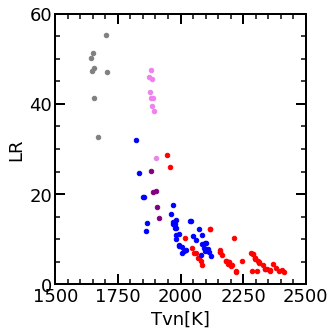

In [46]:
plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5
print(df_H2train)

df_H2trainEa1 = df_H2train[df_H2train['Ea[K]'] > 3000]
df_C2H2trainEa1 =  df_C2H2train[df_C2H2train['Ea[K]'] > 3000]
df_C2H2ARtrainEa1 =  df_C2H2ARtrain[df_C2H2ARtrain['Ea[K]'] > 3000] 
df_C2H2N2trainEa1 =  df_C2H2N2train[df_C2H2N2train['Ea[K]'] > 3000] 
df_C2H4trainEa1 =  df_C2H4train[df_C2H4train['Ea[K]'] > 3000]
df_C2H4ARtrainEa1 =  df_C2H4ARtrain[df_C2H4ARtrain['Ea[K]'] > 3000] 
df_C2H6trainEa1 =  df_C2H6train[df_C2H6train['Ea[K]'] < 3000]
df_C2H6N2OtrainEa1 =  df_C2H6N2Otrain[df_C2H6N2Otrain['Ea[K]'] > 3000] 

df_H2trainEa2 = df_H2trainEa1[df_H2trainEa1['Ea[K]'] < 5000]
df_C2H2trainEa2 =  df_C2H2trainEa1[df_C2H2trainEa1['Ea[K]'] < 5000]
df_C2H2ARtrainEa2 =  df_C2H2ARtrainEa1[df_C2H2ARtrainEa1['Ea[K]'] < 5000] 
df_C2H2N2trainEa2 =  df_C2H2N2trainEa1[df_C2H2N2trainEa1['Ea[K]'] < 5000] 
df_C2H4trainEa2 =  df_C2H4trainEa1[df_C2H4trainEa1['Ea[K]'] < 5000]
df_C2H4ARtrainEa2 =  df_C2H4ARtrainEa1[df_C2H4ARtrainEa1['Ea[K]'] < 5000] 
df_C2H6trainEa2 =  df_C2H6trainEa1[df_C2H6trainEa1['Ea[K]'] < 5000]
df_C2H6N2OtrainEa2 =  df_C2H6N2OtrainEa1[df_C2H6N2OtrainEa1['Ea[K]'] < 5000] 

plt.scatter(df_H2trainEa2['Tvn[K]'],df_H2trainEa2['Lr'],s=20,color='grey')
plt.scatter(df_C2H2trainEa2['Tvn[K]'],df_C2H2trainEa2['Lr'],s=20,color='red')
plt.scatter(df_C2H2ARtrainEa2['Tvn[K]'],df_C2H2ARtrainEa2['Lr'],s=20,color='black')
plt.scatter(df_C2H2N2trainEa2['Tvn[K]'],df_C2H2N2trainEa2['Lr'],s=20,color='purple')
plt.scatter(df_C2H4trainEa2['Tvn[K]'],df_C2H4trainEa2['Lr'],s=20,color='blue')
plt.scatter(df_C2H4ARtrainEa2['Tvn[K]'],df_C2H4ARtrainEa2['Lr'],s=20,color='orange')
plt.scatter(df_C2H6trainEa2['Tvn[K]'],df_C2H6trainEa2['Lr'],s=20,color='green')
plt.scatter(df_C2H6N2OtrainEa2['Tvn[K]'],df_C2H6N2OtrainEa2['Lr'],s=20,color='violet')

plt.xlim(1500, 2500)
plt.ylim(0, 60)
plt.xticks(np.arange(1500, 2501, step=250))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('Tvn[K]')
plt.ylabel('LR')
plt.tight_layout()
plt.savefig("gurafu29.png")

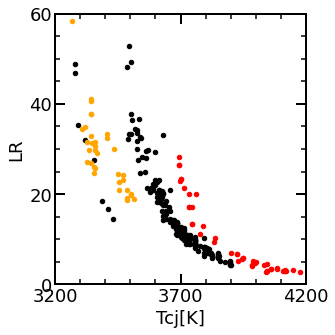

In [35]:
#.query('1>P0>0.4')
#Index(['P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
#       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]', 'theta'],
#      dtype='object')



plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

df_H2train1 = df_H2train[df_H2train['Tvn[K]'] > 2200]
df_C2H2train1 =  df_C2H2train[df_C2H2train['Tvn[K]'] > 2200]
df_C2H2ARtrain1 =  df_C2H2ARtrain[df_C2H2ARtrain['Tvn[K]'] > 2200] 
df_C2H2N2train1 =  df_C2H2N2train[df_C2H2N2train['Tvn[K]'] > 2200] 
df_C2H4train1 =  df_C2H4train[df_C2H4train['Tvn[K]'] > 2200]
df_C2H4ARtrain1 =  df_C2H4ARtrain[df_C2H4ARtrain['Tvn[K]'] > 2200] 
df_C2H6train1 =  df_C2H6train[df_C2H6train['Tvn[K]'] > 2200]
df_C2H6N2Otrain1 =  df_C2H6N2Otrain[df_C2H6N2Otrain['Tvn[K]'] > 2200] 

plt.scatter(df_H2train1['Tcj[K]'],df_H2train1['Lr'],s=20,color='grey')
plt.scatter(df_C2H2train1['Tcj[K]'],df_C2H2train1['Lr'],s=20,color='red')
plt.scatter(df_C2H2ARtrain1['Tcj[K]'],df_C2H2ARtrain1['Lr'],s=20,color='black')
plt.scatter(df_C2H2N2train1['Tcj[K]'],df_C2H2N2train1['Lr'],s=20,color='purple')
plt.scatter(df_C2H4train1['Tcj[K]'],df_C2H4train1['Lr'],s=20,color='blue')
plt.scatter(df_C2H4ARtrain1['Tcj[K]'],df_C2H4ARtrain1['Lr'],s=20,color='orange')
plt.scatter(df_C2H6train1['Tcj[K]'],df_C2H6train1['Lr'],s=20,color='green')
plt.scatter(df_C2H6N2Otrain1['Tcj[K]'],df_C2H6N2Otrain1['Lr'],s=20,color='violet')

plt.xlim(3200, 4200)
plt.ylim(0, 60)
plt.xticks(np.arange(3200, 4201, step=500))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('Tcj[K]')
plt.ylabel('LR')
plt.tight_layout()
plt.savefig("gurafu29.png")

        P0 Fuel Diluent  Equivalentratio  CoefficientDiluent Oxidizer  \
274  0.901   H2     NaN             1.00                 NaN       O2   
243  0.443   H2     NaN             1.00                 NaN       O2   
309  0.970   H2     NaN             0.95                 NaN       O2   
337  0.852   H2     NaN             0.63                 NaN       O2   
291  0.642   H2     NaN             0.83                 NaN       O2   
..     ...  ...     ...              ...                 ...      ...   
296  0.900   H2     NaN             0.83                 NaN       O2   
346  0.807   H2     NaN             1.30                 NaN       O2   
259  0.693   H2     NaN             1.00                 NaN       O2   
345  0.728   H2     NaN             1.30                 NaN       O2   
328  0.800   H2     NaN             1.05                 NaN       O2   

     diluentratio  H0[KJ/kg]  M0[kg/kmol]   γ0[-]  ...   Tvn[K]  Hvn[KJ/kg]  \
274           0.0      -4.59       12.010  1

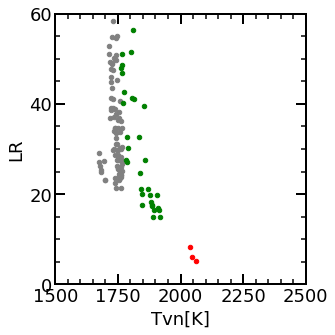

In [47]:
#.query('1>P0>0.4')
#Index(['P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
#       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]', 'theta'],
#      dtype='object')



plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5
print(df_H2train)

df_H2trainEa1 = df_H2train[df_H2train['Ea[K]'] > 5000]
df_C2H2trainEa1 =  df_C2H2train[df_C2H2train['Ea[K]'] > 5000]
df_C2H2ARtrainEa1 =  df_C2H2ARtrain[df_C2H2ARtrain['Ea[K]'] > 5000] 
df_C2H2N2trainEa1 =  df_C2H2N2train[df_C2H2N2train['Ea[K]'] > 5000] 
df_C2H4trainEa1 =  df_C2H4train[df_C2H4train['Ea[K]'] > 5000]
df_C2H4ARtrainEa1 =  df_C2H4ARtrain[df_C2H4ARtrain['Ea[K]'] > 5000] 
df_C2H6trainEa1 =  df_C2H6train[df_C2H6train['Ea[K]'] > 5000]
df_C2H6N2OtrainEa1 =  df_C2H6N2Otrain[df_C2H6N2Otrain['Ea[K]'] > 5000] 

plt.scatter(df_H2trainEa1['Tvn[K]'],df_H2trainEa1['Lr'],s=20,color='grey')
plt.scatter(df_C2H2trainEa1['Tvn[K]'],df_C2H2trainEa1['Lr'],s=20,color='red')
plt.scatter(df_C2H2ARtrainEa1['Tvn[K]'],df_C2H2ARtrainEa1['Lr'],s=20,color='black')
plt.scatter(df_C2H2N2trainEa1['Tvn[K]'],df_C2H2N2trainEa1['Lr'],s=20,color='purple')
plt.scatter(df_C2H4trainEa1['Tvn[K]'],df_C2H4trainEa1['Lr'],s=20,color='blue')
plt.scatter(df_C2H4ARtrainEa1['Tvn[K]'],df_C2H4ARtrainEa1['Lr'],s=20,color='orange')
plt.scatter(df_C2H6trainEa1['Tvn[K]'],df_C2H6trainEa1['Lr'],s=20,color='green')
plt.scatter(df_C2H6N2OtrainEa1['Tvn[K]'],df_C2H6N2OtrainEa1['Lr'],s=20,color='violet')

plt.xlim(1500, 2500)
plt.ylim(0, 60)
plt.xticks(np.arange(1500, 2501, step=250))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('Tvn[K]')
plt.ylabel('LR')
plt.tight_layout()
plt.savefig("gurafu29.png")

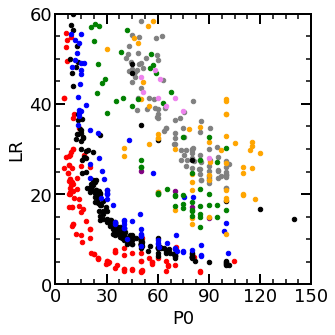

In [24]:
#Index(['P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
#       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]', 'theta'],
#      dtype='object')



plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.scatter(X_H2train['P0']*100,y_H2train,s=20,color='grey')
plt.scatter(X_C2H2train['P0']*100,y_C2H2train,s=20,color='red')
plt.scatter(X_C2H2ARtrain['P0']*100,y_C2H2ARtrain,s=20,color='black')
plt.scatter(X_C2H2N2train['P0']*100,y_C2H2N2train,s=20,color='purple')
plt.scatter(X_C2H4train['P0']*100,y_C2H4train,s=20,color='blue')
plt.scatter(X_C2H4ARtrain['P0']*100,y_C2H4ARtrain,s=20,color='orange')
plt.scatter(X_C2H6train['P0']*100,y_C2H6train,s=20,color='green')
plt.scatter(X_C2H6N2Otrain['P0']*100,y_C2H6N2Otrain,s=20,color='violet')

plt.xlim(0, 150)
plt.ylim(0, 60)
plt.xticks(np.arange(0, 151, step=30))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('P0')
plt.ylabel('LR')
plt.tight_layout()
plt.savefig("gurafu29.png")

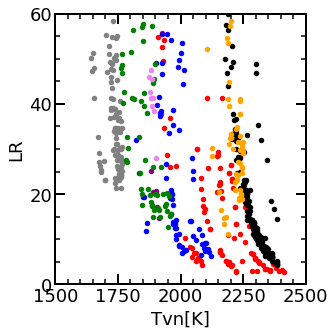

In [29]:
#Index(['P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
#       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]', 'theta'],
#      dtype='object')

a='Tvn[K]'

plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.scatter(X_H2train[a],y_H2train,s=20,color='grey')
plt.scatter(X_C2H2train[a],y_C2H2train,s=20,color='red')
plt.scatter(X_C2H2ARtrain[a],y_C2H2ARtrain,s=20,color='black')
plt.scatter(X_C2H2N2train[a],y_C2H2N2train,s=20,color='purple')
plt.scatter(X_C2H4train[a],y_C2H4train,s=20,color='blue')
plt.scatter(X_C2H4ARtrain[a],y_C2H4ARtrain,s=20,color='orange')
plt.scatter(X_C2H6train[a],y_C2H6train,s=20,color='green')
plt.scatter(X_C2H6N2Otrain[a],y_C2H6N2Otrain,s=20,color='violet')

plt.xlim(1500, 2500)
plt.ylim(0, 60)
plt.xticks(np.arange(1500, 2501, step=250))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel(a)
plt.ylabel('LR')
plt.tight_layout()
plt.savefig("gurafu29.png")

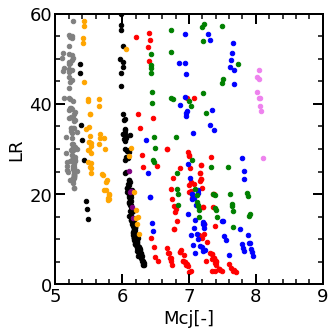

In [32]:
#Index(['P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
#       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]', 'theta'],
#      dtype='object')

a='Mcj[-]'

plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.scatter(X_H2train[a],y_H2train,s=20,color='grey')
plt.scatter(X_C2H2train[a],y_C2H2train,s=20,color='red')
plt.scatter(X_C2H2ARtrain[a],y_C2H2ARtrain,s=20,color='black')
plt.scatter(X_C2H2N2train[a],y_C2H2N2train,s=20,color='purple')
plt.scatter(X_C2H4train[a],y_C2H4train,s=20,color='blue')
plt.scatter(X_C2H4ARtrain[a],y_C2H4ARtrain,s=20,color='orange')
plt.scatter(X_C2H6train[a],y_C2H6train,s=20,color='green')
plt.scatter(X_C2H6N2Otrain[a],y_C2H6N2Otrain,s=20,color='violet')

plt.xlim(5, 9)
plt.ylim(0, 60)
plt.xticks(np.arange(5, 9.1, step=1))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel(a)
plt.ylabel('LR')
plt.tight_layout()
plt.savefig("gurafu29.png")

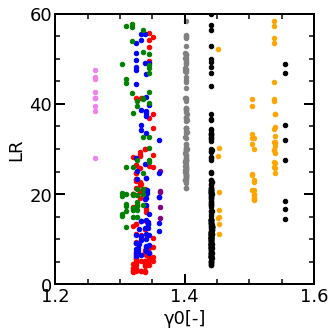

In [34]:
#Index(['P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
#       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]', 'theta'],
#      dtype='object')

a='γ0[-]'

plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.scatter(X_H2train[a],y_H2train,s=20,color='grey')
plt.scatter(X_C2H2train[a],y_C2H2train,s=20,color='red')
plt.scatter(X_C2H2ARtrain[a],y_C2H2ARtrain,s=20,color='black')
plt.scatter(X_C2H2N2train[a],y_C2H2N2train,s=20,color='purple')
plt.scatter(X_C2H4train[a],y_C2H4train,s=20,color='blue')
plt.scatter(X_C2H4ARtrain[a],y_C2H4ARtrain,s=20,color='orange')
plt.scatter(X_C2H6train[a],y_C2H6train,s=20,color='green')
plt.scatter(X_C2H6N2Otrain[a],y_C2H6N2Otrain,s=20,color='violet')

plt.xlim(1.2, 1.6)
plt.ylim(0, 60)
plt.xticks(np.arange(1.2, 1.61, step=0.2))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel(a)
plt.ylabel('LR')
plt.tight_layout()
plt.savefig("gurafu29.png")

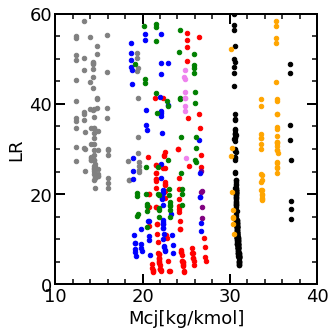

In [36]:
#Index(['P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
#       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]', 'theta'],
#      dtype='object')

a='Mcj[kg/kmol]'

plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.scatter(X_H2train[a],y_H2train,s=20,color='grey')
plt.scatter(X_C2H2train[a],y_C2H2train,s=20,color='red')
plt.scatter(X_C2H2ARtrain[a],y_C2H2ARtrain,s=20,color='black')
plt.scatter(X_C2H2N2train[a],y_C2H2N2train,s=20,color='purple')
plt.scatter(X_C2H4train[a],y_C2H4train,s=20,color='blue')
plt.scatter(X_C2H4ARtrain[a],y_C2H4ARtrain,s=20,color='orange')
plt.scatter(X_C2H6train[a],y_C2H6train,s=20,color='green')
plt.scatter(X_C2H6N2Otrain[a],y_C2H6N2Otrain,s=20,color='violet')

plt.xlim(10, 40)
plt.ylim(0, 60)
plt.xticks(np.arange(10, 41, step=10))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel(a)
plt.ylabel('LR')
plt.tight_layout()
plt.savefig("gurafu29.png")

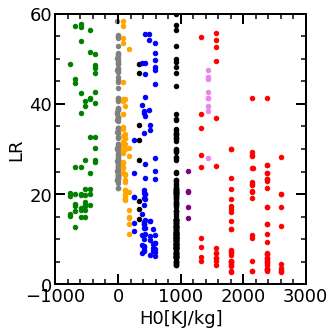

In [39]:
#Index(['P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
#       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]', 'theta'],
#      dtype='object')

a='H0[KJ/kg]'

plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.scatter(X_H2train[a],y_H2train,s=20,color='grey')
plt.scatter(X_C2H2train[a],y_C2H2train,s=20,color='red')
plt.scatter(X_C2H2ARtrain[a],y_C2H2ARtrain,s=20,color='black')
plt.scatter(X_C2H2N2train[a],y_C2H2N2train,s=20,color='purple')
plt.scatter(X_C2H4train[a],y_C2H4train,s=20,color='blue')
plt.scatter(X_C2H4ARtrain[a],y_C2H4ARtrain,s=20,color='orange')
plt.scatter(X_C2H6train[a],y_C2H6train,s=20,color='green')
plt.scatter(X_C2H6N2Otrain[a],y_C2H6N2Otrain,s=20,color='violet')

plt.xlim(-1000, 3000)
plt.ylim(0, 60)
plt.xticks(np.arange(-1000, 3001, step=1000))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel(a)
plt.ylabel('LR')
plt.tight_layout()
plt.savefig("gurafu29.png")

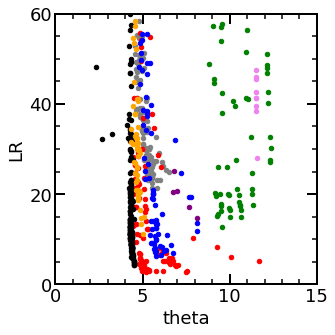

In [42]:
#Index(['P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
#       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]', 'theta'],
#      dtype='object')

a='theta'

plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.scatter(X_H2train[a],y_H2train,s=20,color='grey')
plt.scatter(X_C2H2train[a],y_C2H2train,s=20,color='red')
plt.scatter(X_C2H2ARtrain[a],y_C2H2ARtrain,s=20,color='black')
plt.scatter(X_C2H2N2train[a],y_C2H2N2train,s=20,color='purple')
plt.scatter(X_C2H4train[a],y_C2H4train,s=20,color='blue')
plt.scatter(X_C2H4ARtrain[a],y_C2H4ARtrain,s=20,color='orange')
plt.scatter(X_C2H6train[a],y_C2H6train,s=20,color='green')
plt.scatter(X_C2H6N2Otrain[a],y_C2H6N2Otrain,s=20,color='violet')

plt.xlim(0, 15)
plt.ylim(0, 60)
plt.xticks(np.arange(0, 15.1, step=5))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel(a)
plt.ylabel('LR')
plt.tight_layout()
plt.savefig("gurafu29.png")

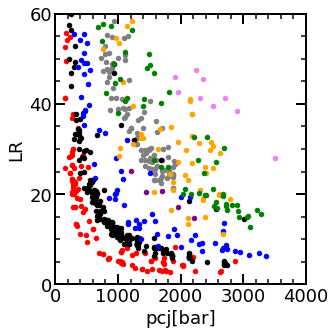

In [66]:
#Index(['P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
#       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]', 'theta'],
#      dtype='object')

a='pcj[bar]'

plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.scatter(X_H2train[a]*100,y_H2train,s=20,color='grey')
plt.scatter(X_C2H2train[a]*100,y_C2H2train,s=20,color='red')
plt.scatter(X_C2H2ARtrain[a]*100,y_C2H2ARtrain,s=20,color='black')
plt.scatter(X_C2H2N2train[a]*100,y_C2H2N2train,s=20,color='purple')
plt.scatter(X_C2H4train[a]*100,y_C2H4train,s=20,color='blue')
plt.scatter(X_C2H4ARtrain[a]*100,y_C2H4ARtrain,s=20,color='orange')
plt.scatter(X_C2H6train[a]*100,y_C2H6train,s=20,color='green')
plt.scatter(X_C2H6N2Otrain[a]*100,y_C2H6N2Otrain,s=20,color='violet')

plt.xlim(0, 4000)
plt.ylim(0, 60)
plt.xticks(np.arange(0, 4000.1, step=1000))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel(a)
plt.ylabel('LR')
plt.tight_layout()
plt.savefig("gurafu29.png")

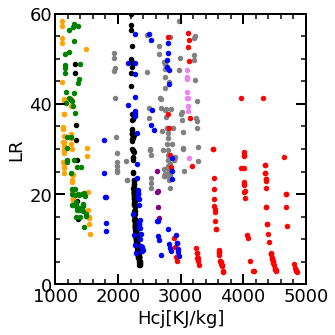

In [53]:
#Index(['P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
#       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]', 'theta'],
#      dtype='object')

a='Hcj[KJ/kg]'

plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.scatter(X_H2train[a],y_H2train,s=20,color='grey')
plt.scatter(X_C2H2train[a],y_C2H2train,s=20,color='red')
plt.scatter(X_C2H2ARtrain[a],y_C2H2ARtrain,s=20,color='black')
plt.scatter(X_C2H2N2train[a],y_C2H2N2train,s=20,color='purple')
plt.scatter(X_C2H4train[a],y_C2H4train,s=20,color='blue')
plt.scatter(X_C2H4ARtrain[a],y_C2H4ARtrain,s=20,color='orange')
plt.scatter(X_C2H6train[a],y_C2H6train,s=20,color='green')
plt.scatter(X_C2H6N2Otrain[a],y_C2H6N2Otrain,s=20,color='violet')

plt.xlim(1000, 5000)
plt.ylim(0, 60)
plt.xticks(np.arange(1000, 5000.1, step=1000))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel(a)
plt.ylabel('LR')
plt.tight_layout()
plt.savefig("gurafu29.png")

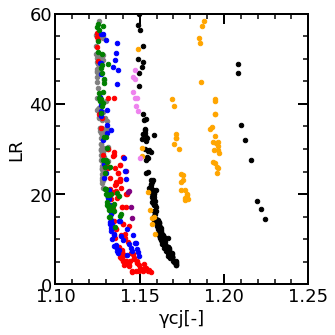

In [57]:
#Index(['P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
#       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]', 'theta'],
#      dtype='object')

a='γcj[-]'

plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.scatter(X_H2train[a],y_H2train,s=20,color='grey')
plt.scatter(X_C2H2train[a],y_C2H2train,s=20,color='red')
plt.scatter(X_C2H2ARtrain[a],y_C2H2ARtrain,s=20,color='black')
plt.scatter(X_C2H2N2train[a],y_C2H2N2train,s=20,color='purple')
plt.scatter(X_C2H4train[a],y_C2H4train,s=20,color='blue')
plt.scatter(X_C2H4ARtrain[a],y_C2H4ARtrain,s=20,color='orange')
plt.scatter(X_C2H6train[a],y_C2H6train,s=20,color='green')
plt.scatter(X_C2H6N2Otrain[a],y_C2H6N2Otrain,s=20,color='violet')

plt.xlim(1.1, 1.25)
plt.ylim(0, 60)
plt.xticks(np.arange(1.1, 1.251, step=0.05))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel(a)
plt.ylabel('LR')
plt.tight_layout()
plt.savefig("gurafu29.png")

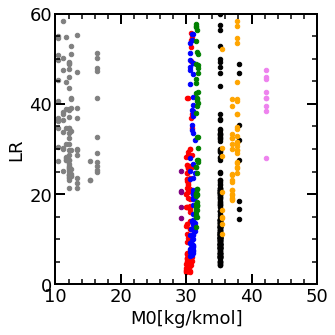

In [60]:
#Index(['P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
#       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]', 'theta'],
#      dtype='object')

a='M0[kg/kmol]'

plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.scatter(X_H2train[a],y_H2train,s=20,color='grey')
plt.scatter(X_C2H2train[a],y_C2H2train,s=20,color='red')
plt.scatter(X_C2H2ARtrain[a],y_C2H2ARtrain,s=20,color='black')
plt.scatter(X_C2H2N2train[a],y_C2H2N2train,s=20,color='purple')
plt.scatter(X_C2H4train[a],y_C2H4train,s=20,color='blue')
plt.scatter(X_C2H4ARtrain[a],y_C2H4ARtrain,s=20,color='orange')
plt.scatter(X_C2H6train[a],y_C2H6train,s=20,color='green')
plt.scatter(X_C2H6N2Otrain[a],y_C2H6N2Otrain,s=20,color='violet')

plt.xlim(10, 50)
plt.ylim(0, 60)
plt.xticks(np.arange(10, 51, step=10))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel(a)
plt.ylabel('LR')
plt.tight_layout()
plt.savefig("gurafu29.png")

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


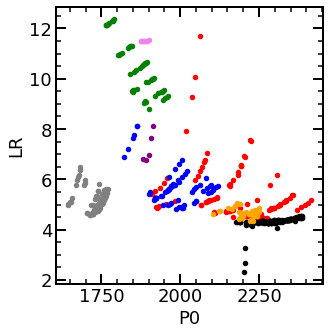

In [9]:
l6 = ['Fuel','Equivalentratio','P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]', 'theta']
       

plt.figure(figsize=(5,5))

plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4.0

plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2.0

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1.5

plt.scatter(X_H2train['Tvn[K]'],X_H2train['theta'],s=20,color='grey')
plt.scatter(X_C2H2train['Tvn[K]'],X_C2H2train['theta'],s=20,color='red')
plt.scatter(X_C2H2ARtrain['Tvn[K]'],X_C2H2ARtrain['theta'],s=20,color='black')
plt.scatter(X_C2H2N2train['Tvn[K]'],X_C2H2N2train['theta'],s=20,color='purple')
plt.scatter(X_C2H4train['Tvn[K]'],X_C2H4train['theta'],s=20,color='blue')
plt.scatter(X_C2H4ARtrain['Tvn[K]'],X_C2H4ARtrain['theta'],s=20,color='orange')
plt.scatter(X_C2H6train['Tvn[K]'],X_C2H6train['theta'],s=20,color='green')
plt.scatter(X_C2H6N2Otrain['Tvn[K]'],X_C2H6N2Otrain['theta'],s=20,color='violet')

#plt.xlim(1300, 1900)
#plt.ylim(0, 60)
#plt.xticks(np.arange(0, 1.501, step=0.5))
#plt.yticks(np.arange(0, 61, step=20))
plt.xlabel('P0')
plt.ylabel('LR')
plt.tight_layout()
plt.savefig("gurafu29.png")

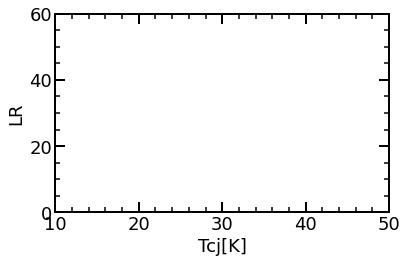

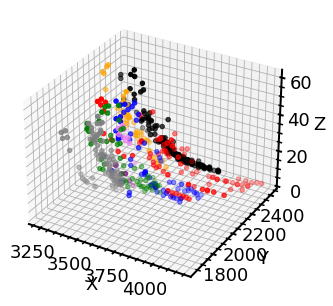

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Index(['P0', 'H0[KJ/kg]', 'M0[kg/kmol]', 'γ0[-]', 'pcj[bar]', 'Tcj[K]',
#       'Hcj[KJ/kg]', 'Mcj[kg/kmol]', 'γcj[-]', 'Mcj[-]', 'Tvn[K]', 'theta'],
#      dtype='object')

a='Tcj[K]'
b= 'Tvn[K]'


plt.xlim(10, 50)
plt.ylim(0, 60)
plt.xticks(np.arange(10, 51, step=10))
plt.yticks(np.arange(0, 61, step=20))
plt.xlabel(a)
plt.ylabel('LR')
plt.tight_layout()
plt.savefig("gurafu29.png")

# グラフの枠を作成
fig = plt.figure()
ax = Axes3D(fig)

# X,Y,Z軸にラベルを設定
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# .plotで描画
ax.scatter(X_H2train[a],X_H2train[b],y_H2train,s=20,color='grey')
ax.scatter(X_C2H2train[a],X_C2H2train[b],y_C2H2train,s=20,color='red')
ax.scatter(X_C2H2ARtrain[a],X_C2H2ARtrain[b],y_C2H2ARtrain,s=20,color='black')
ax.scatter(X_C2H2N2train[a],X_C2H2N2train[b],y_C2H2N2train,s=20,color='purple')
ax.scatter(X_C2H4train[a],X_C2H4train[b],y_C2H4train,s=20,color='blue')
ax.scatter(X_C2H4ARtrain[a],X_C2H4ARtrain[b],y_C2H4ARtrain,s=20,color='orange')
ax.scatter(X_C2H6train[a],X_C2H6train[b],y_C2H6train,s=20,color='green')
ax.scatter(X_C2H6N2Otrain[a],X_C2H6N2Otrain[b],y_C2H6N2Otrain,s=20,color='violet')

# 最後に.show()を書いてグラフ表示
plt.show()

In [ ]:
dfH2exfai = dfH2exfai.query('0.6>P0>0.4')
